<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/Loan_Tap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: LoanTap Logistic Regression
### Objective 
*  LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

* The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

* Personal Loan
* EMI Free Loan
* Personal Overdraft
* Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

#### Import Packages

In [1]:
# Import required packages
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing Libs
import pandas as pd #data processing using DataFrames
import numpy as np #Numrical calculations
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import re
import datetime
from dateutil.relativedelta import relativedelta
#Plotting Libs
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import plotly.express as px # plotting
#Statistics Libs
from scipy.stats import binom, poisson,expon # For Probability Distribution.
import plotly.figure_factory as ff # distplot 
from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency
import scipy.stats as st# categorical Vs categorical
from datetime import datetime
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric

from scipy.stats import kstest,levene,norm,shapiro # cdf
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF
# Prec


#### Import & Load data

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921")

# Statistical Summary

### Meta-data of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Description of the dataframe

In [4]:
df.describe().T

count          mean           std     min       25%  \
loan_amnt             396030.0  14113.888089   8357.441341  500.00   8000.00   
int_rate              396030.0     13.639400      4.472157    5.32     10.49   
installment           396030.0    431.849698    250.727790   16.08    250.33   
annual_inc            396030.0  74203.175798  61637.621158    0.00  45000.00   
dti                   396030.0     17.379514     18.019092    0.00     11.28   
open_acc              396030.0     11.311153      5.137649    0.00      8.00   
pub_rec               396030.0      0.178191      0.530671    0.00      0.00   
revol_bal             396030.0  15844.539853  20591.836109    0.00   6025.00   
revol_util            395754.0     53.791749     24.452193    0.00     35.80   
total_acc             396030.0     25.414744     11.886991    2.00     17.00   
mort_acc              358235.0      1.813991      2.147930    0.00      0.00   
pub_rec_bankruptcies  395495.0      0.121648      0.356174    0.00      0.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.30     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00       86.00  
revol_bal             11181.00  19620.00  1743266.00  
revol_util               54.80     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      3.00       34.00  
pub_rec_bankruptcies      0.00      0.00        8.00

In [5]:
df.describe(include='all').T

count  unique                          top    freq  \
loan_amnt             396030.0     NaN                          NaN     NaN   
term                    396030       2                    36 months  302005   
int_rate              396030.0     NaN                          NaN     NaN   
installment           396030.0     NaN                          NaN     NaN   
grade                   396030       7                            B  116018   
sub_grade               396030      35                           B3   26655   
emp_title               373103  173105                      Teacher    4389   
emp_length              377729      11                    10+ years  126041   
home_ownership          396030       6                     MORTGAGE  198348   
annual_inc            396030.0     NaN                          NaN     NaN   
verification_status     396030       3                     Verified  139563   
issue_d                 396030     115                     Oct-2014   14846   
loan_status             396030       2                   Fully Paid  318357   
purpose                 396030      14           debt_consolidation  234507   
title                   394275   48817           Debt consolidation  152472   
dti                   396030.0     NaN                          NaN     NaN   
earliest_cr_line        396030     684                     Oct-2000    3017   
open_acc              396030.0     NaN                          NaN     NaN   
pub_rec               396030.0     NaN                          NaN     NaN   
revol_bal             396030.0     NaN                          NaN     NaN   
revol_util            395754.0     NaN                          NaN     NaN   
total_acc             396030.0     NaN                          NaN     NaN   
initial_list_status     396030       2                            f  238066   
application_type        396030       3                   INDIVIDUAL  395319   
mort_acc              358235.0     NaN                          NaN     NaN   
pub_rec_bankruptcies  395495.0     NaN                          NaN     NaN   
address                 396030  393700  USCGC Smith\r\nFPO AE 70466       8   

                              mean           std    min      25%      50%  \
loan_amnt             14113.888089   8357.441341  500.0   8000.0  12000.0   
term                           NaN           NaN    NaN      NaN      NaN   
int_rate                   13.6394      4.472157   5.32    10.49    13.33   
installment             431.849698     250.72779  16.08   250.33   375.43   
grade                          NaN           NaN    NaN      NaN      NaN   
sub_grade                      NaN           NaN    NaN      NaN      NaN   
emp_title                      NaN           NaN    NaN      NaN      NaN   
emp_length                     NaN           NaN    NaN      NaN      NaN   
home_ownership                 NaN           NaN    NaN      NaN      NaN   
annual_inc            74203.175798  61637.621158    0.0  45000.0  64000.0   
verification_status            NaN           NaN    NaN      NaN      NaN   
issue_d                        NaN           NaN    NaN      NaN      NaN   
loan_status                    NaN           NaN    NaN      NaN      NaN   
purpose                        NaN           NaN    NaN      NaN      NaN   
title                          NaN           NaN    NaN      NaN      NaN   
dti                      17.379514     18.019092    0.0    11.28    16.91   
earliest_cr_line               NaN           NaN    NaN      NaN      NaN   
open_acc                 11.311153      5.137649    0.0      8.0     10.0   
pub_rec                   0.178191      0.530671    0.0      0.0      0.0   
revol_bal             15844.539853  20591.836109    0.0   6025.0  11181.0   
revol_util               53.791749     24.452193    0.0     35.8     54.8   
total_acc                25.414744     11.886991    2.0     17.0     24.0   
initial_list_status            NaN       

In [6]:
# only object type columns
df.describe(include='object').T

count  unique                          top    freq
term                 396030       2                    36 months  302005
grade                396030       7                            B  116018
sub_grade            396030      35                           B3   26655
emp_title            373103  173105                      Teacher    4389
emp_length           377729      11                    10+ years  126041
home_ownership       396030       6                     MORTGAGE  198348
verification_status  396030       3                     Verified  139563
issue_d              396030     115                     Oct-2014   14846
loan_status          396030       2                   Fully Paid  318357
purpose              396030      14           debt_consolidation  234507
title                394275   48817           Debt consolidation  152472
earliest_cr_line     396030     684                     Oct-2000    3017
initial_list_status  396030       2                            f  238066
application_type     396030       3                   INDIVIDUAL  395319
address              396030  393700  USCGC Smith\r\nFPO AE 70466       8

### Shape of the data

In [7]:
### Data shape
print("Loan Top dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Loan Top dataset has 396030 rows and 27 columns.


### Size & Count

In [8]:
# total number of elements/records 
df.size

10692810

### Column Names

In [9]:
# Columna names
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

* loan_amnt :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

### Column data typess

In [10]:
### Data type of all attributes
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

# Data Pre-processing

### Check for Missing Values

In [11]:
# Missing Values

print("Total missing values in Dataset " + str(df.isnull().sum().sum()))
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values[null_values["Null Values"]!=0].sort_values(by=["Null Values"],ascending=False)


Total missing values in Dataset 81589


Null Values  Percentage Null Value
mort_acc                    37795               9.543469
emp_title                   22927               5.789208
emp_length                  18301               4.621115
title                        1755               0.443148
pub_rec_bankruptcies          535               0.135091
revol_util                    276               0.069692

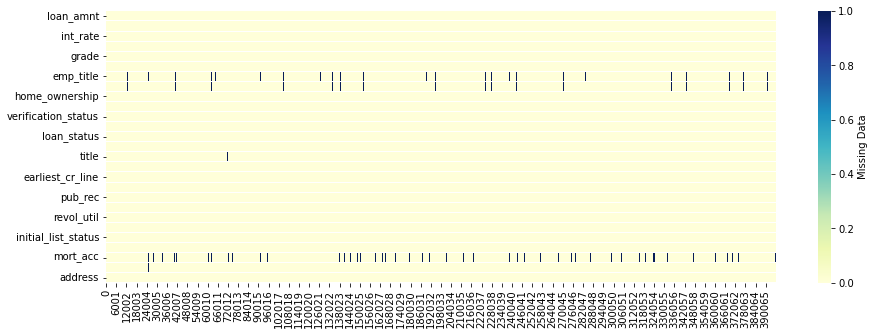

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [13]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['emp_title'].fillna('unknown_Emp_title', inplace=True)

In [14]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['emp_length'].fillna(method="ffill", inplace=True)

In [15]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['mort_acc'].fillna(df['mort_acc'].median(), inplace=True)

In [16]:
# Since the number of missing item is less we can remove row with null in title, pub_rec_bankruptcies, revol_util . 
df.dropna(inplace=True)

In [17]:
df.isnull().sum().sum()

0

#### **Observation**: *There is no missing value in the given dataset for any attribute*

### Check for duplicates

In [18]:
# duplicates
df.duplicated().sum()

0

#### **Observation**: *There is no duplicate value in the given dataset*

In [19]:

pd.set_option('display.max_columns', None)
df.head(4)


loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   

         emp_title emp_length home_ownership  annual_inc verification_status  \
0        Marketing  10+ years           RENT    117000.0        Not Verified   
1  Credit analyst     4 years       MORTGAGE     65000.0        Not Verified   
2     Statistician   < 1 year           RENT     43057.0     Source Verified   
3  Client Advocate    6 years           RENT     54000.0        Not Verified   

    issue_d loan_status             purpose                    title    dti  \
0  Jan-2015  Fully Paid            vacation                 Vacation  26.24   
1  Jan-2015  Fully Paid  debt_consolidation       Debt consolidation  22.05   
2  Jan-2015  Fully Paid         credit_card  Credit card refinancing  12.79   
3  Nov-2014  Fully Paid         credit_card  Credit card refinancing   2.60   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2         Aug-2007      13.0      0.0    11987.0        92.2       26.0   
3         Sep-2006       6.0      0.0     5472.0        21.5       13.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   
2                   f       INDIVIDUAL       0.0                   0.0   
3                   f       INDIVIDUAL       0.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813

### Dataset Copy

### Feature Engineering

In [37]:
# Take a working copy of the given dataset
work_df = df.copy()

In [38]:
work_df['issue_d_month'], work_df['issue_d_year'] = work_df['issue_d'].str.split('-', 1).str
work_df['earliest_cr_line_month'], work_df['earliest_cr_line_year'] = work_df['earliest_cr_line'].str.split('-', 1).str

In [39]:
work_df[ 'city_state_zip'] = work_df['address'].astype(str).str[-8:]


In [40]:

work_df['pin'] = work_df['city_state_zip'].str.extract(r'\b(\d{5})\b', expand=False)
work_df['city_code'] = work_df['city_state_zip'].str.extract(r'\b(\w{2})\b', expand=False)
work_df.head(3)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   

         emp_title emp_length home_ownership  annual_inc verification_status  \
0        Marketing  10+ years           RENT    117000.0        Not Verified   
1  Credit analyst     4 years       MORTGAGE     65000.0        Not Verified   
2     Statistician   < 1 year           RENT     43057.0     Source Verified   

    issue_d loan_status             purpose                    title    dti  \
0  Jan-2015  Fully Paid            vacation                 Vacation  26.24   
1  Jan-2015  Fully Paid  debt_consolidation       Debt consolidation  22.05   
2  Jan-2015  Fully Paid         credit_card  Credit card refinancing  12.79   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2         Aug-2007      13.0      0.0    11987.0        92.2       26.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   
2                   f       INDIVIDUAL       0.0                   0.0   

                                             address issue_d_month  \
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690           Jan   
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113           Jan   
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113           Jan   

  issue_d_year earliest_cr_line_month earliest_cr_line_year city_state_zip  \
0         2015                    Jun                  1990       OK 22690   
1         2015                    Jul                  2004       SD 05113   
2         2015                    Aug                  2007       WV 05113   

     pin city_code  
0  22690        OK  
1  05113        SD  
2  05113        WV

In [41]:
#Simple Feature Engineering steps:
#Creation of Flags    
pub_rec_fea = lambda value : 0 if(value == 0) else 1
mort_acc_fea= lambda value : 0 if(value == 0) else (1 if (value>=1) else value)
pub_rec_bankruptcies_fea= lambda value : 0 if(value == 0) else (1 if (value>=1) else value)

work_df['pub_rec'] = work_df.pub_rec.apply(pub_rec_fea)
 
work_df['mort_acc'] = work_df.mort_acc.apply(mort_acc_fea)
     
work_df['pub_rec_bankruptcies'] = work_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies_fea)

In [42]:

# Convert the emp_length to a numerical column
# Before converting the datatype, let's make <1 yrs as 0 years and 10+ yrs to 10 years
work_df['emp_length'] = work_df['emp_length'].replace(['< 1 year'], '0 year')
work_df['emp_length'] = work_df['emp_length'].replace(['10+ years'], '10 years')
work_df[['emp_len', 'emp_years']] = work_df['emp_length'].str.split(' ', expand=True)

work_df['emp_len'] = work_df['emp_len'].astype(int)

In [43]:

work_df['home_ownership'].replace({"NONE":"OTHER", "ANY": "OTHER"}, inplace=True)

In [44]:

term_values = {' 36 months': 36, ' 60 months': 60}
work_df['term'] = work_df['term'].map(term_values)

In [45]:
work_df['issue_d'] = pd.to_datetime(work_df['issue_d'])
work_df['earliest_cr_line'] = pd.to_datetime(work_df['earliest_cr_line'])

In [46]:
now = datetime.now()

work_df['cur_date'] = pd.Series([now.date() for x in range(len(work_df.index))])
work_df['cur_date'] = pd.to_datetime(work_df['cur_date'])


In [47]:
work_df['tenure'] = (12 * (work_df['cur_date'].dt.year - work_df['issue_d'].dt.year) + (work_df['cur_date'].dt.month - work_df['issue_d'].dt.month))
work_df['credit_line_Tenure'] = (12 * (work_df['cur_date'].dt.year - work_df['earliest_cr_line'].dt.year) + (work_df['cur_date'].dt.month - work_df['earliest_cr_line'].dt.month))


In [48]:
# Drop the address column as it may not have much significant for our analysis
work_df.drop(['address','earliest_cr_line','issue_d','emp_length', 'emp_years','city_state_zip','cur_date'], axis='columns', inplace=True)

In [32]:
work_df.head(3)

loan_amnt  term  int_rate  installment grade sub_grade        emp_title  \
0    10000.0    36     11.44       329.48     B        B4        Marketing   
1     8000.0    36     11.99       265.68     B        B5  Credit analyst    
2    15600.0    36     10.49       506.97     B        B3     Statistician   

  home_ownership  annual_inc verification_status loan_status  \
0           RENT    117000.0        Not Verified  Fully Paid   
1       MORTGAGE     65000.0        Not Verified  Fully Paid   
2           RENT     43057.0     Source Verified  Fully Paid   

              purpose                    title    dti  open_acc  pub_rec  \
0            vacation                 Vacation  26.24      16.0        0   
1  debt_consolidation       Debt consolidation  22.05      17.0        0   
2         credit_card  Credit card refinancing  12.79      13.0        0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies issue_d_month issue_d_year  \
0         0                     0           Jan         2015   
1         1                     0           Jan         2015   
2         0                     0           Jan         2015   

  earliest_cr_line_month earliest_cr_line_year    pin city_code  emp_len  \
0                    Jun                  1990  22690        OK       10   
1                    Jul                  2004  05113        SD        4   
2                    Aug                  2007  05113        WV        0   

   tenure  credit_line_Tenure  
0    97.0               392.0  
1    97.0               223.0  
2    97.0               186.0

In [49]:
work_df.isnull().sum().sum()

5090

In [50]:

# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
work_df['tenure'].fillna(method="ffill", inplace=True)
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'

work_df['credit_line_Tenure'].fillna(work_df['credit_line_Tenure'].median(), inplace=True)

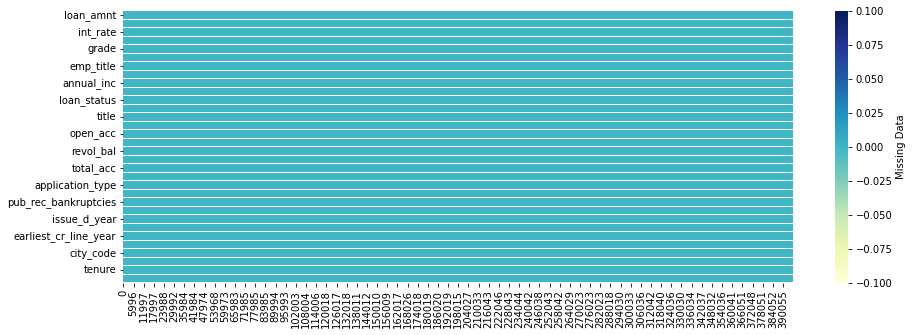

In [51]:
plt.figure(figsize=(15,5))
sns.heatmap(work_df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [53]:
print("Total missing values in Dataset " + str(work_df.isnull().sum().sum()))
null_value= pd.DataFrame({"Null Values" : work_df.isna().sum(),
                           "Percentage Null Value": (work_df.isna().sum()/(work_df.shape[0])*(100))})
null_value[null_value["Null Values"]!=0].sort_values(by=["Null Values"],ascending=False)


Total missing values in Dataset 0


Empty DataFrame
Columns: [Null Values, Percentage Null Value]
Index: []

In [55]:
num_features = [y for y in work_df.columns if work_df[y].dtype not in ('object','datetime64')]
num_features
#[ 'term', 'sub_grade',
 #      'loan_status',  
  #     'emp_duration', 'credit_line_age', 'loan_age']

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'emp_len',
 'tenure',
 'credit_line_Tenure']

In [56]:
# categorical_features=list(work_df.select_dtypes('object').columns)
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'pin',
 'city_code']

In [57]:

def percentage_outliers(df, column_name):
    data = df[column_name]
    
    # calculate the upper and lower bounds for outliers
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # identify outliers
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    
    # calculate the percentage of outliers
    percentage = (len(outliers) / len(df)) * 100
    outlier_count=len(outliers)
    
    return percentage, outlier_count

In [58]:
def outlier_summary(num_features):
  out_per=pd.DataFrame({'Column': [],	'percentage': [], 'count':[]})
  for cols in num_features:
    #print(cols)
    #print(cols.type)
    per, out_count=percentage_outliers(work_df, cols)
    #print(per)
    new_row={'Column':cols, 'percentage':per,'count':out_count}
    out_per = out_per.append(new_row, ignore_index=True)
  return out_per
   
out_sum=outlier_summary(num_features)
out_sum

Column  percentage    count
0              loan_amnt    0.046002    181.0
1                   term   23.748237  93441.0
2               int_rate    0.944430   3716.0
3            installment    2.831001  11139.0
4             annual_inc    4.214098  16581.0
5                    dti    0.065063    256.0
6               open_acc    2.599469  10228.0
7                pub_rec   14.586050  57391.0
8              revol_bal    5.360070  21090.0
9             revol_util    0.002796     11.0
10             total_acc    2.147840   8451.0
11              mort_acc    0.000000      0.0
12  pub_rec_bankruptcies   11.402793  44866.0
13               emp_len    0.000000      0.0
14                tenure    1.941215   7638.0
15    credit_line_Tenure    3.069905  12079.0

In [ ]:
def replace_outliers_iqr(df, column, multiplier=1.5):
    Q1, Q3 = df[column].quantile([0.05, 0.95])
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df

In [ ]:
#for i in num_features:
#  iqr_method=replace_outliers_iqr(work_df, i)
#iqr_method.describe().T

In [59]:
work_df[num_features].describe().T

count          mean           std     min       25%  \
loan_amnt             393465.0  14117.269960   8353.190693  500.00   8000.00   
term                  393465.0     41.699577     10.212979   36.00     36.00   
int_rate              393465.0     13.638728      4.468866    5.32     10.49   
installment           393465.0    431.946979    250.582348   16.08    250.33   
annual_inc            393465.0  74212.294265  61628.502516    0.00  45000.00   
dti                   393465.0     17.383396     18.061993    0.00     11.29   
open_acc              393465.0     11.317601      5.133143    1.00      8.00   
pub_rec               393465.0      0.145860      0.352967    0.00      0.00   
revol_bal             393465.0  15849.758057  20552.685648    0.00   6042.00   
revol_util            393465.0     53.828586     24.434544    0.00     35.90   
total_acc             393465.0     25.425893     11.883416    2.00     17.00   
mort_acc              393465.0      0.646591      0.478029    0.00      0.00   
pub_rec_bankruptcies  393465.0      0.114028      0.317846    0.00      0.00   
emp_len               393465.0      5.941098      3.644620    0.00      3.00   
tenure                393465.0    108.037861     17.201028   74.00     95.00   
credit_line_Tenure    393465.0    296.850025     86.086436  112.00    238.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
term                     36.00     36.00       60.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.49     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00        1.00  
revol_bal             11194.00  19630.00  1743266.00  
revol_util               54.90     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      1.00        1.00  
pub_rec_bankruptcies      0.00      0.00        1.00  
emp_len                   6.00     10.00       10.00  
tenure                  107.00    118.00      186.00  
credit_line_Tenure      281.00    340.00      949.00

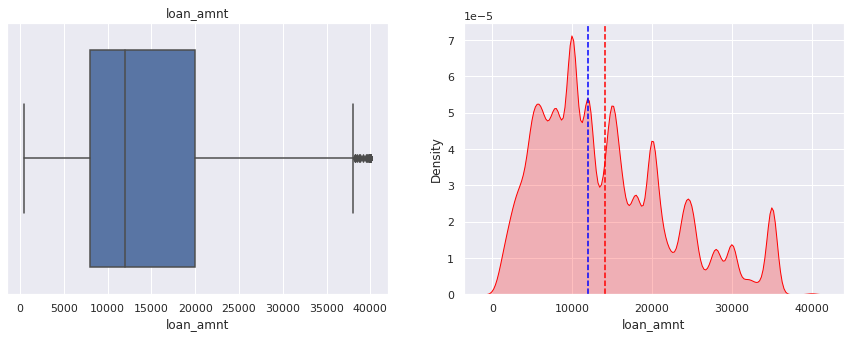

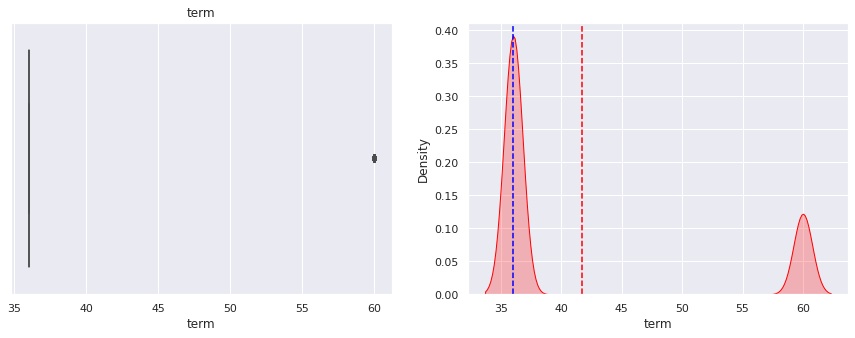

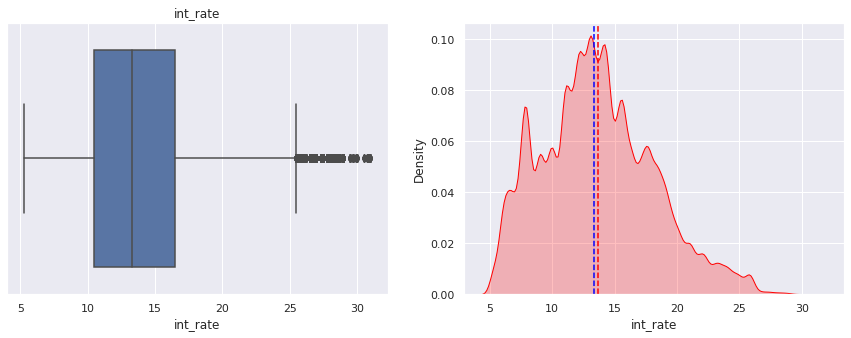

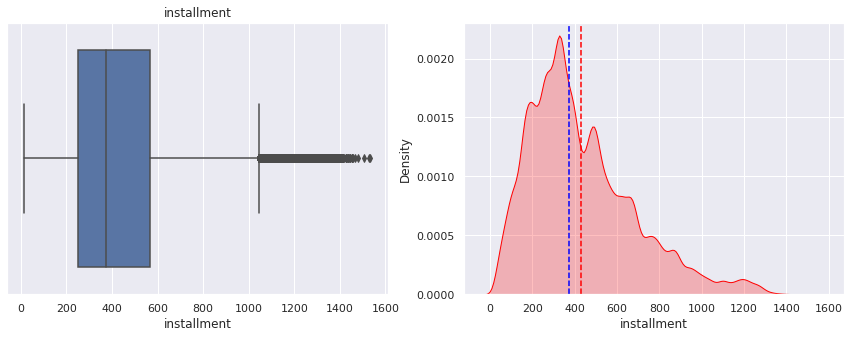

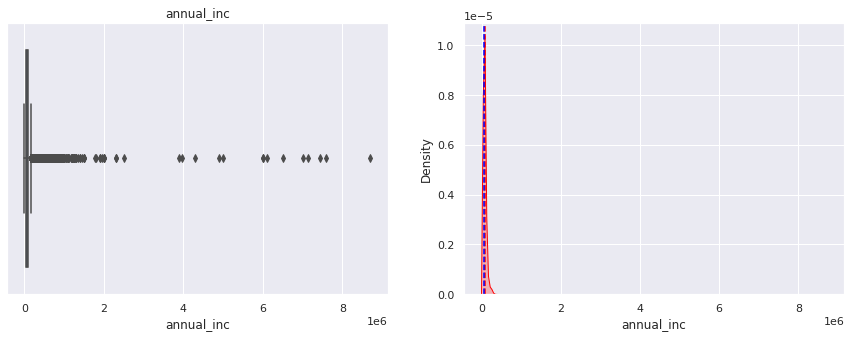

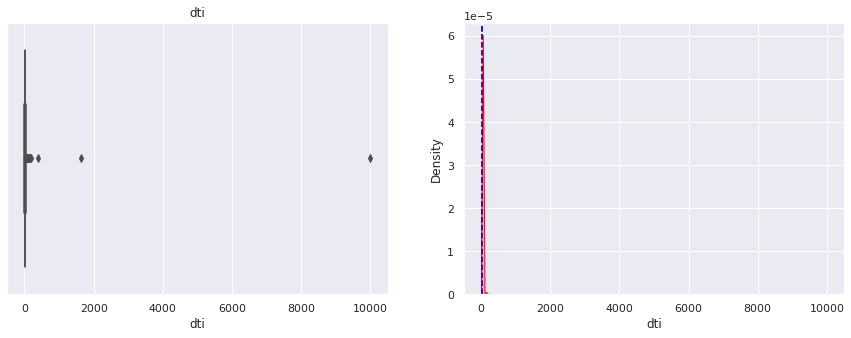

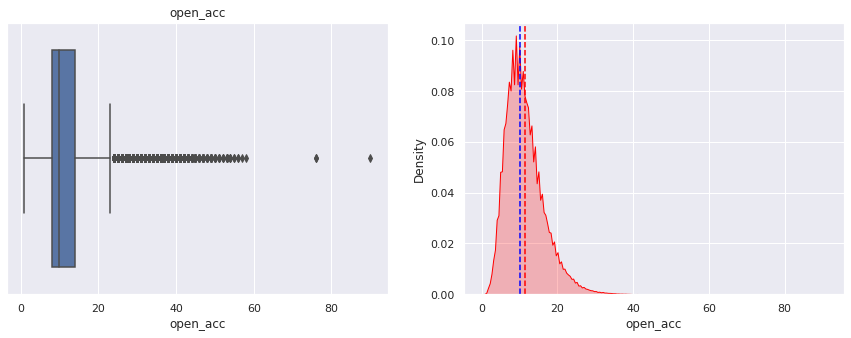

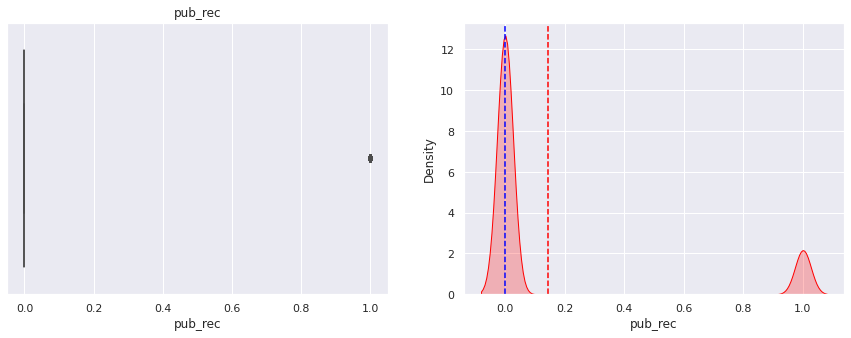

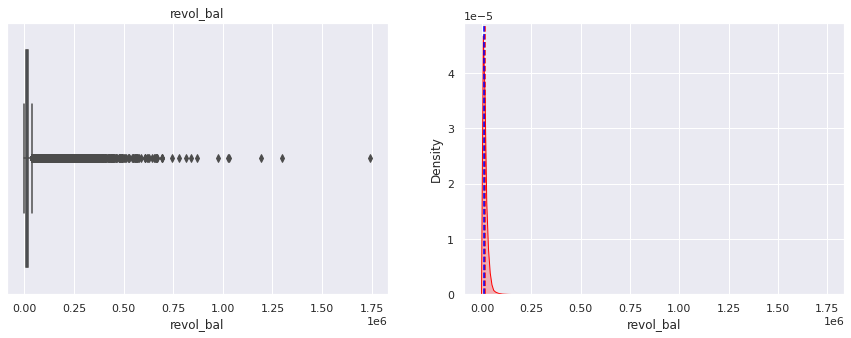

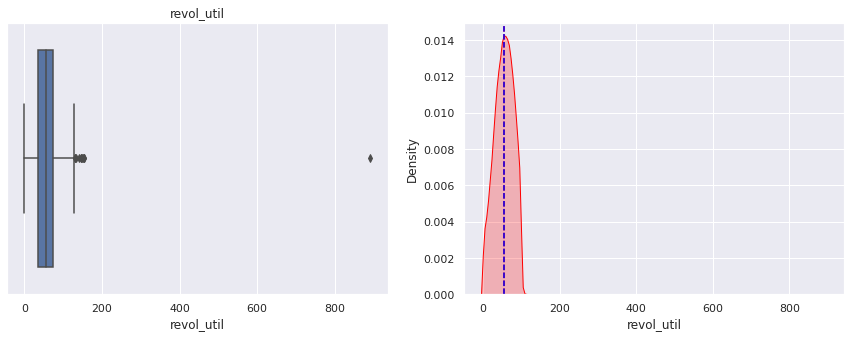

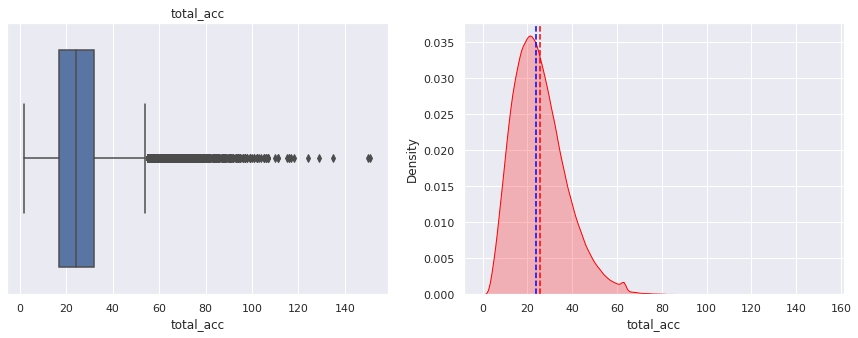

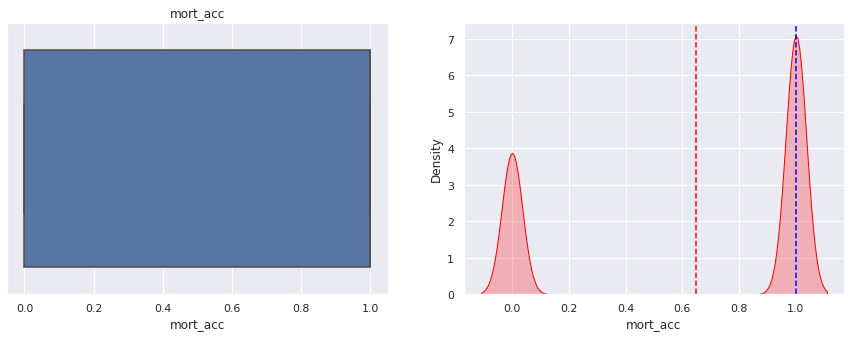

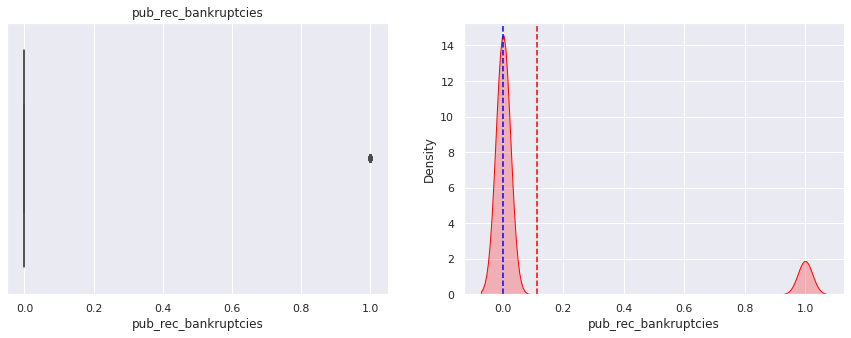

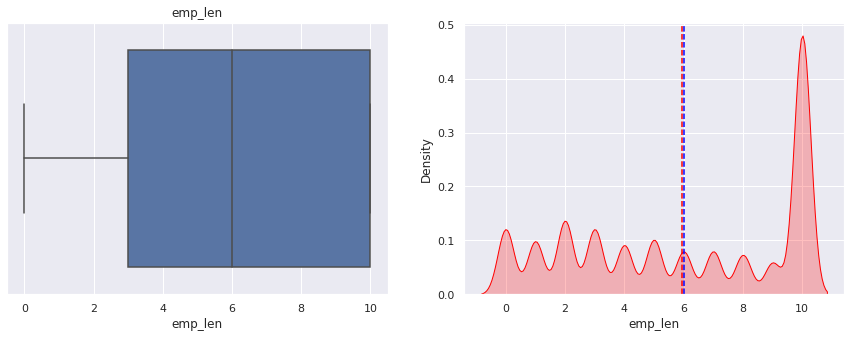

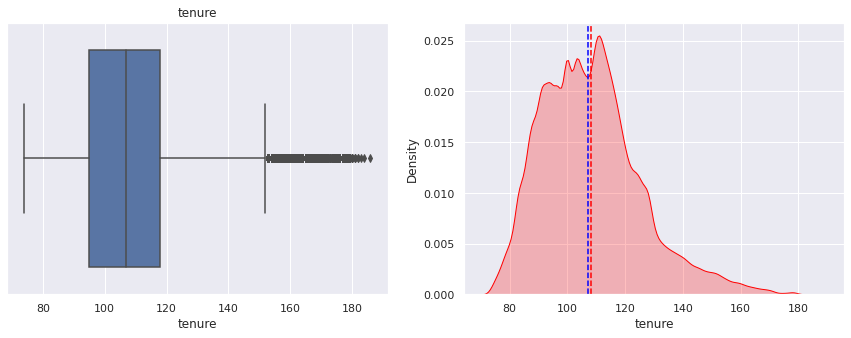

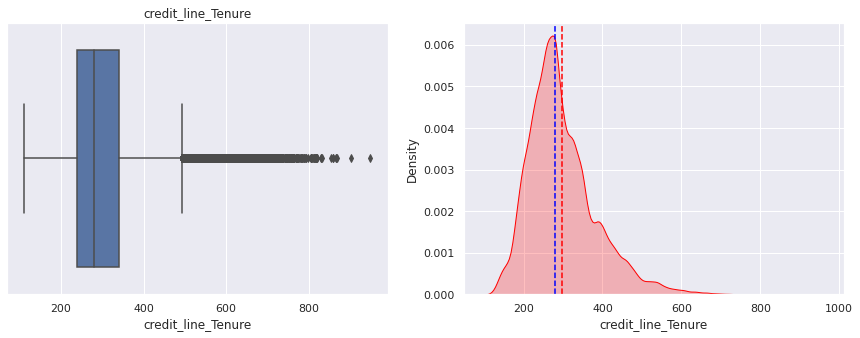

['loan_amnt',
 'term',
 'installment',
 'annual_inc',
 'revol_bal',
 'credit_line_age',
 'loan_age']

In [60]:
sns.set_theme(style='darkgrid')

for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=work_df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=work_df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=work_df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()
['loan_amnt', 'term', 'installment', 'annual_inc', 'revol_bal', 'credit_line_age', 'loan_age']

In [61]:
for i, j in enumerate(['loan_amnt',
 'installment','total_acc','dti',
 'annual_inc',
 'revol_bal','tenure','credit_line_Tenure']):
  q1 = work_df[j].quantile(0.25)
  q3 = work_df[j].quantile(0.75)
  iqr = q3 - q1
  work_df = work_df[(work_df[j] >= q1-1.5*iqr) & (work_df[j] <= q3+1.5*iqr)]

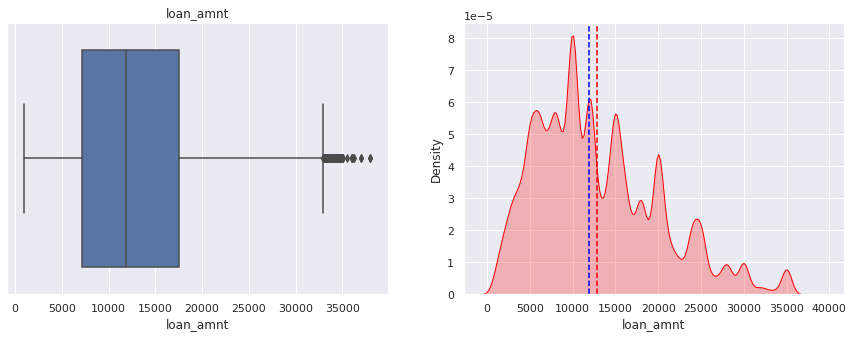

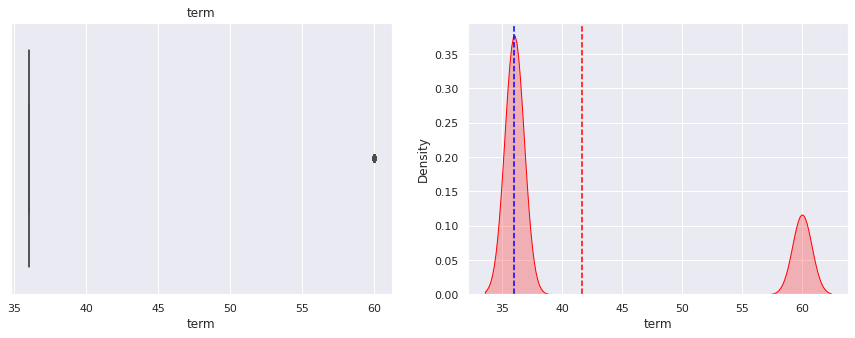

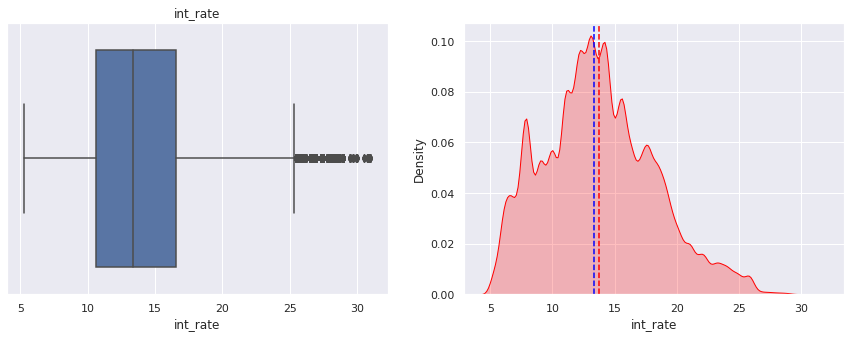

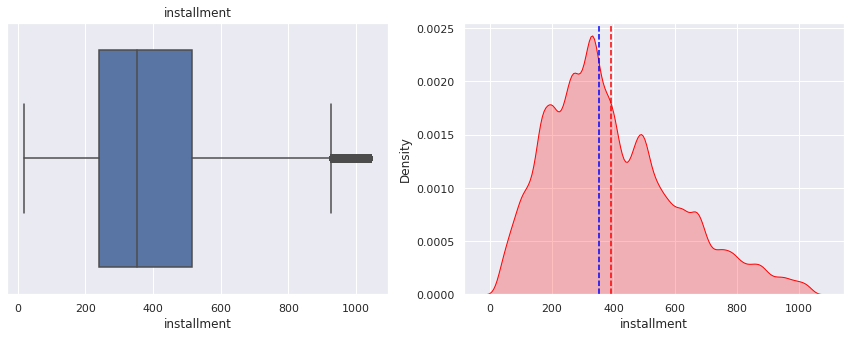

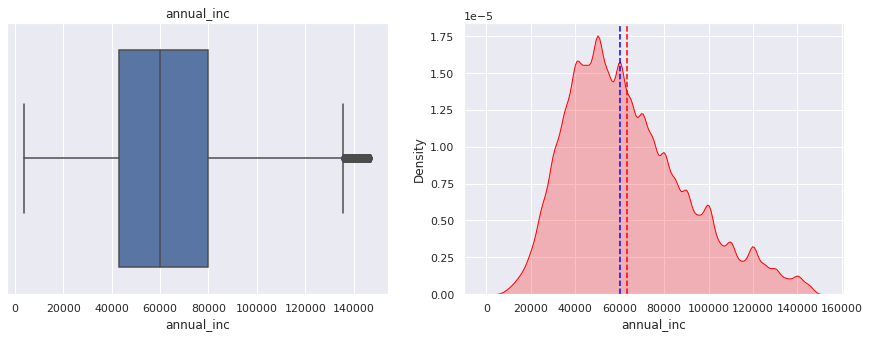

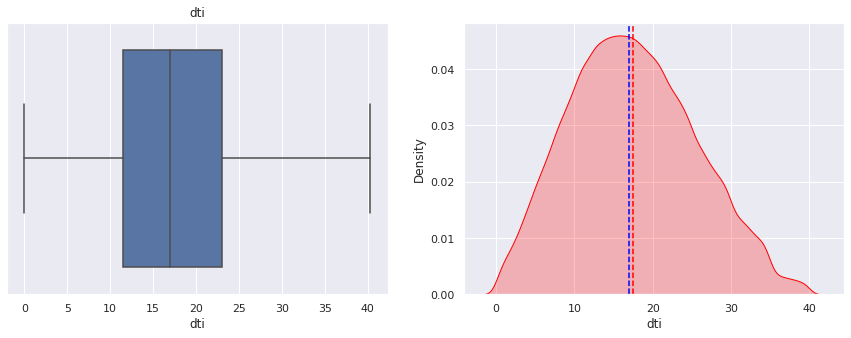

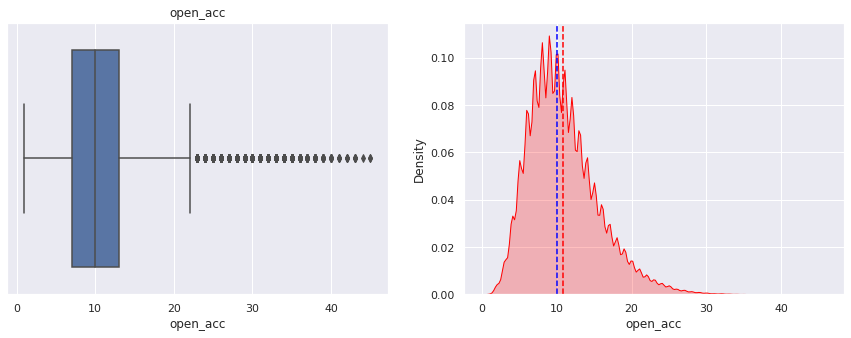

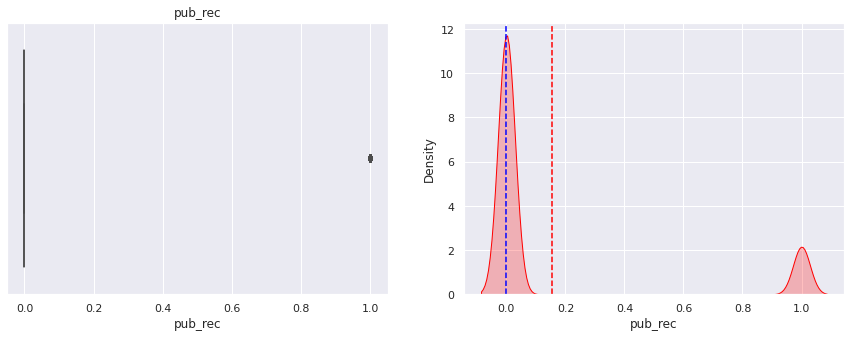

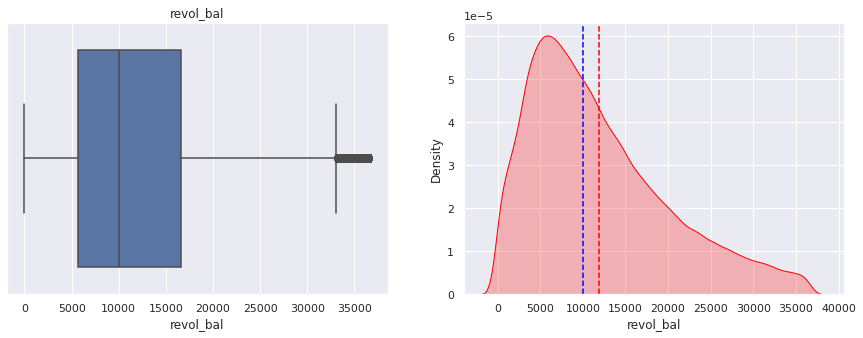

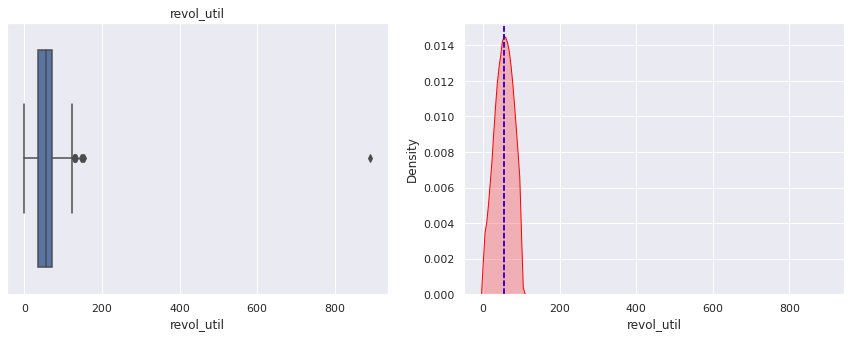

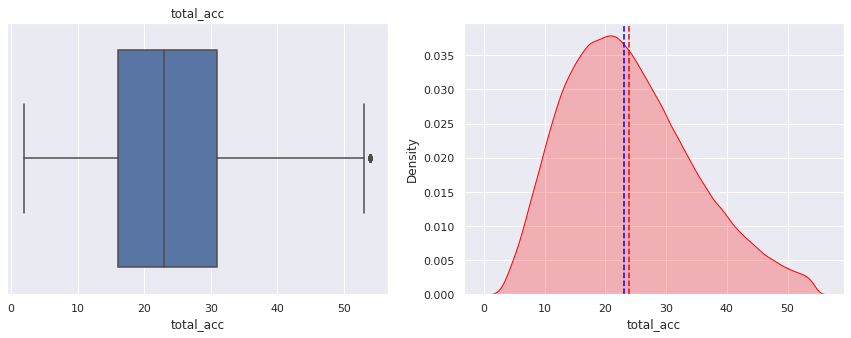

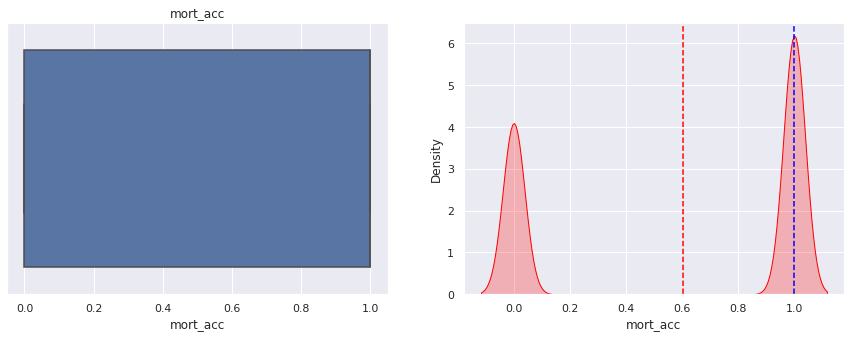

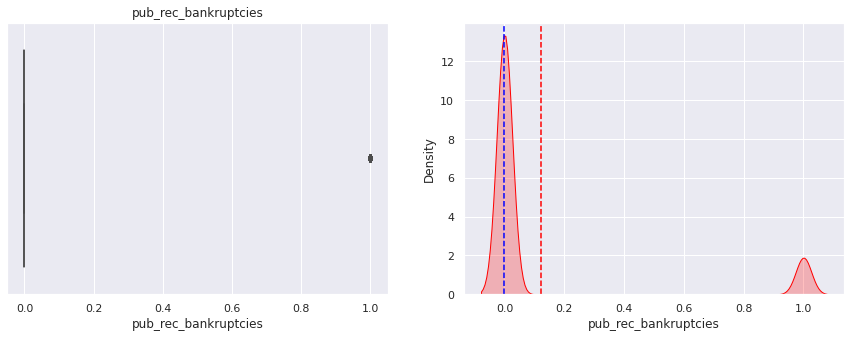

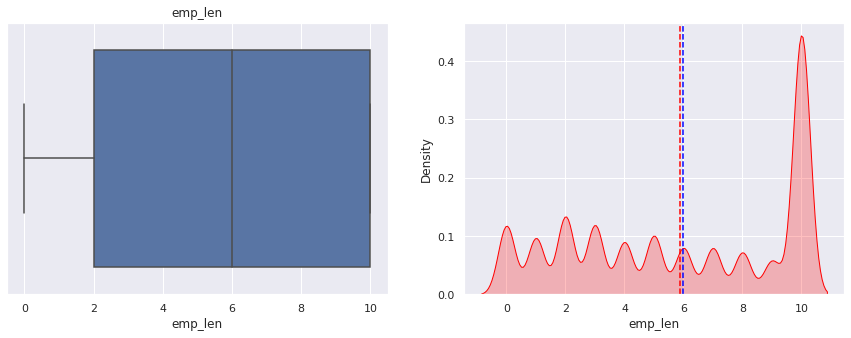

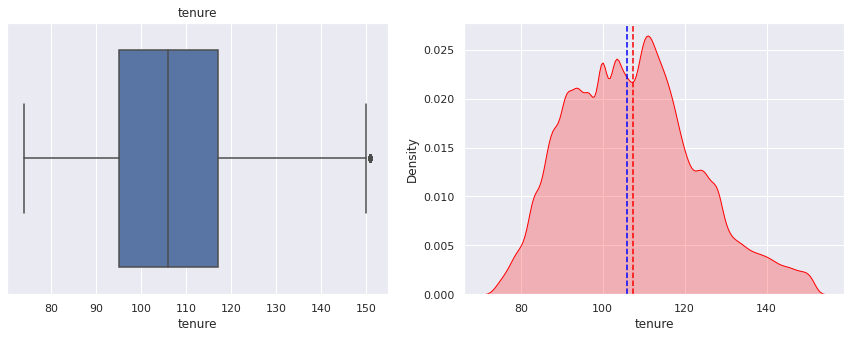

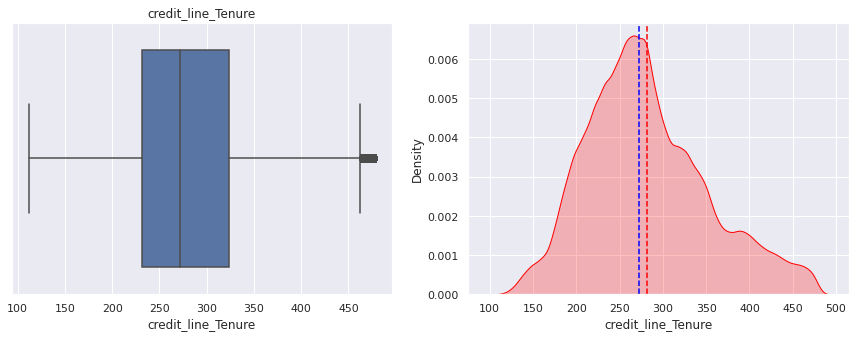

In [62]:
sns.set_theme(style='darkgrid')

for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=work_df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=work_df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=work_df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()

In [ ]:
work_df[num_features].describe().T

count          mean           std      min       25%  \
loan_amnt             318281.0  12869.636029   7250.700147  1000.00   7200.00   
term                  318281.0     41.659150     10.187932    36.00     36.00   
int_rate              318281.0     13.720635      4.438413     5.32     10.65   
installment           318281.0    392.670862    207.116714    20.22    240.15   
annual_inc            318281.0  63447.207431  26854.826898  4000.00  43000.00   
dti                   318281.0     17.443154      8.033812     0.00     11.45   
open_acc              318281.0     10.844147      4.681879     1.00      7.00   
pub_rec               318281.0      0.155165      0.362062     0.00      0.00   
revol_bal             318281.0  11915.081987   8177.435990     0.00   5630.00   
revol_util            318281.0     53.417820     24.134767     0.00     35.70   
total_acc             318281.0     23.898646     10.467854     2.00     16.00   
mort_acc              318281.0      0.601855      0.489516     0.00      0.00   
pub_rec_bankruptcies  318281.0      0.123777      0.329328     0.00      0.00   
emp_len               318281.0      5.869248      3.628266     0.00      2.00   
tenure                318281.0    107.142773     15.507183    74.00     95.00   
credit_line_Tenure    318281.0    281.411812     70.490015   112.00    232.00   

                           50%       75%        max  
loan_amnt             11850.00  17500.00   38000.00  
term                     36.00     36.00      60.00  
int_rate                 13.35     16.55      30.99  
installment             353.01    514.86    1042.30  
annual_inc            60000.00  80000.00  146734.00  
dti                      17.01     23.04      40.33  
open_acc                 10.00     13.00      45.00  
pub_rec                   0.00      0.00       1.00  
revol_bal             10075.00  16589.00   36688.00  
revol_util               54.20     72.00     892.30  
total_acc                23.00     31.00      54.00  
mort_acc                  1.00      1.00       1.00  
pub_rec_bankruptcies      0.00      0.00       1.00  
emp_len                   6.00     10.00      10.00  
tenure                  106.00    117.00     151.00  
credit_line_Tenure      272.00    324.00     478.00

### Data categories

# Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

#### Unique value counts of all attributes

#### Value Counts

In [ ]:
for col in work_df.columns:
  print(f"Loan Status vs {col} \n")
  print(work_df.groupby(by='loan_status')[col].describe().round(1), '\n')
  # Group the data by the values in the 'A' column
  # Create a pie chart from the grouped data
  #df.groupby('loan_status')[col].sum()

  # Show the plot
  
     

Loan Status vs loan_amnt 

                count     mean     std     min     25%      50%      75%  \
loan_status                                                                
Charged Off   64078.0  13975.6  7538.8  1000.0  8000.0  12300.0  19075.0   
Fully Paid   254203.0  12590.9  7149.3  1000.0  7000.0  11200.0  16900.0   

                 max  
loan_status           
Charged Off  35000.0  
Fully Paid   38000.0   

Loan Status vs term 

                count  mean   std   min   25%   50%   75%   max
loan_status                                                    
Charged Off   64078.0  45.3  11.7  36.0  36.0  36.0  60.0  60.0
Fully Paid   254203.0  40.7   9.6  36.0  36.0  36.0  36.0  60.0 

Loan Status vs int_rate 

                count  mean  std  min   25%   50%   75%   max
loan_status                                                  
Charged Off   64078.0  15.9  4.3  5.3  13.0  15.6  18.6  31.0
Fully Paid   254203.0  13.2  4.3  5.3  10.0  13.0  15.8  31.0 

Loan Status vs ins

In [63]:

work_df.nunique()

loan_amnt                   1341
term                           2
int_rate                     424
installment                48821
grade                          7
sub_grade                     35
emp_title                 145399
home_ownership                 4
annual_inc                 22084
verification_status            3
loan_status                    2
purpose                       14
title                      38157
dti                         4007
open_acc                      45
pub_rec                        2
revol_bal                  35343
revol_util                  1184
total_acc                     53
initial_list_status            2
application_type               3
mort_acc                       2
pub_rec_bankruptcies           2
issue_d_month                 12
issue_d_year                   9
earliest_cr_line_month        12
earliest_cr_line_year         48
pin                           10
city_code                     54
emp_len                       11
tenure    

In [64]:
# Number of unique records for each columns
cat_cols=[]
i=0
for col in work_df.columns:
  if len(work_df[col].unique())<=50:
    print(col,len(work_df[col].unique()))
    cat_cols.append(col)
    i=i+1
print(i)
print(cat_cols)

term 2
grade 7
sub_grade 35
home_ownership 4
verification_status 3
loan_status 2
purpose 14
open_acc 45
pub_rec 2
initial_list_status 2
application_type 3
mort_acc 2
pub_rec_bankruptcies 2
issue_d_month 12
issue_d_year 9
earliest_cr_line_month 12
earliest_cr_line_year 48
pin 10
emp_len 11
19
['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'open_acc', 'pub_rec', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year', 'pin', 'emp_len']


### Graphical Analysis

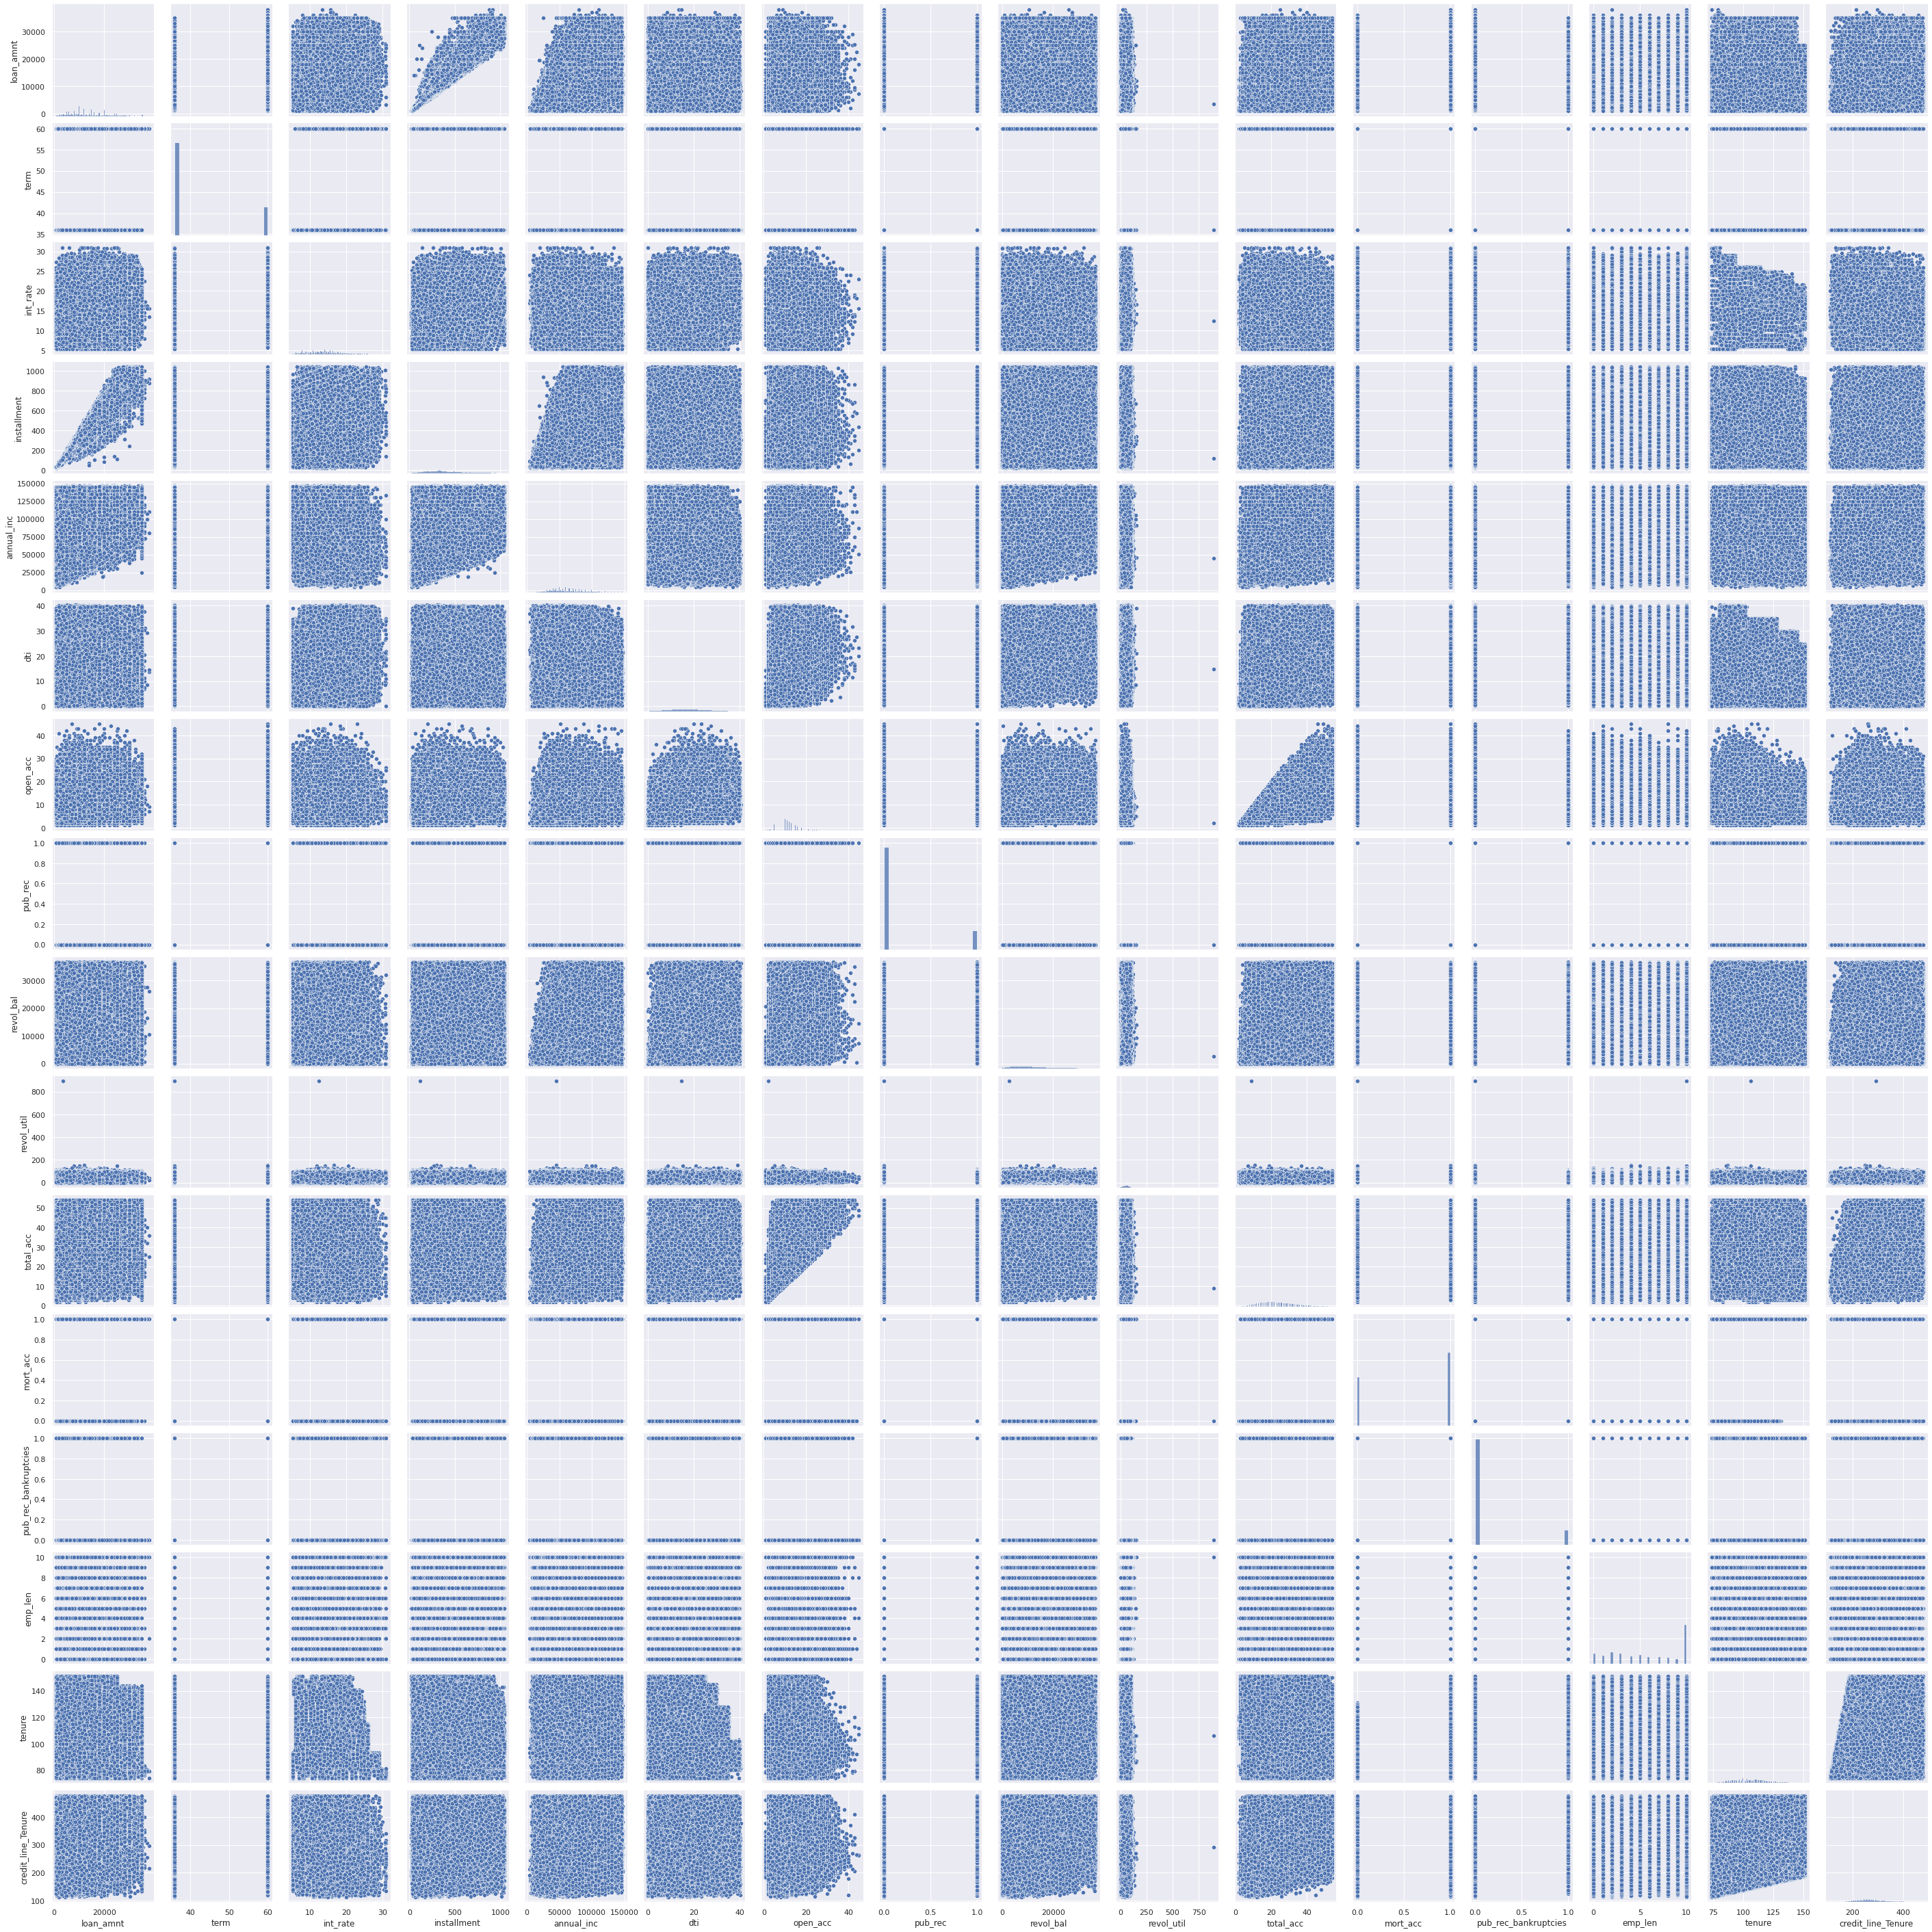

In [ ]:
sns.pairplot(work_df)

#### Univariate Analysis

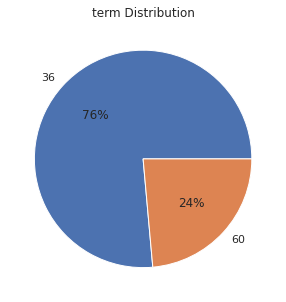

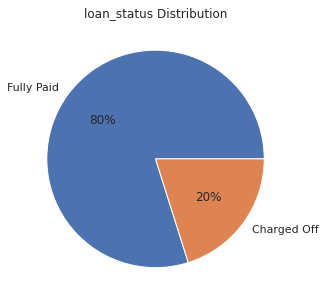

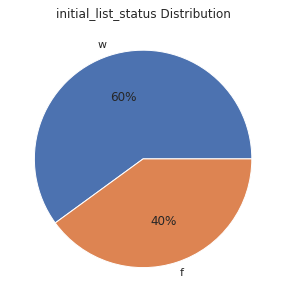

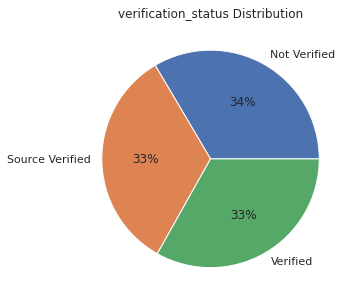

In [71]:
Cat_col=['term','loan_status','initial_list_status','verification_status']
i=1
for cols in Cat_col:
  
  plt.figure(figsize=(15,5))
  plt.pie(work_df[cols].value_counts(),labels=work_df[cols].unique() ,autopct='%.0f%%')
  plt.title(f'{cols} Distribution')
  plt.show()
  print()

#### **Observation**: *Gender distribution amongst patients is almost same*

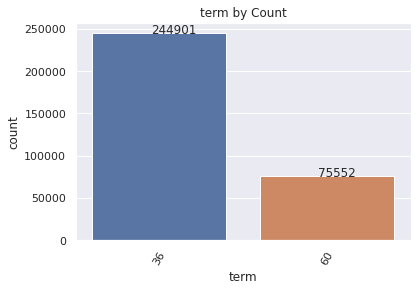

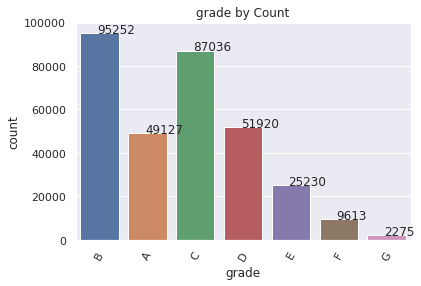

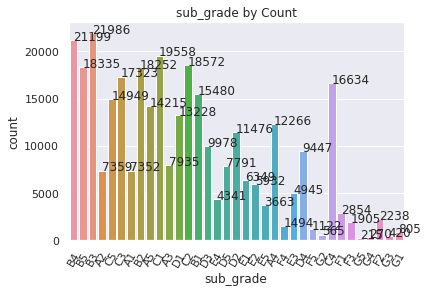

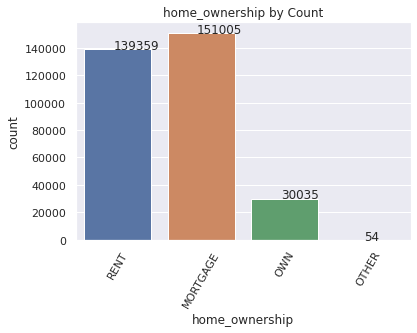

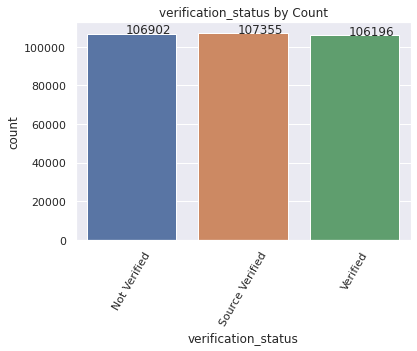

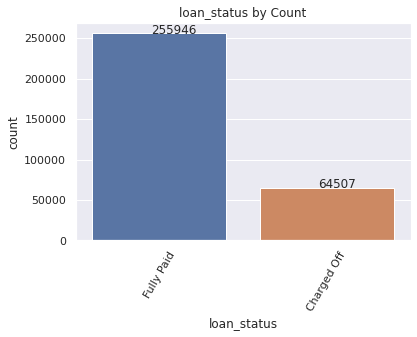

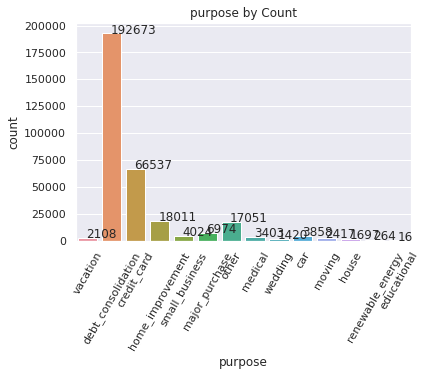

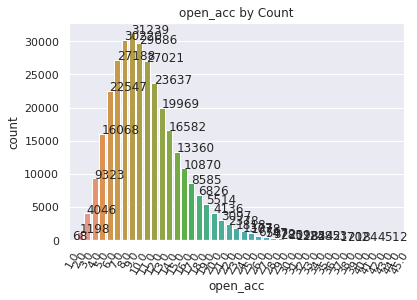

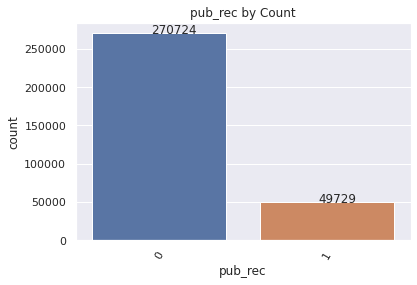

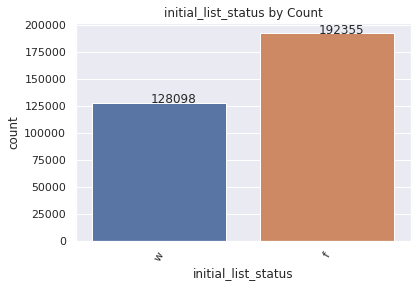

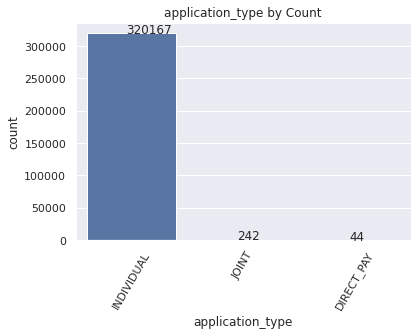

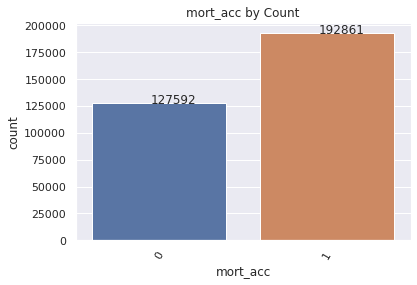

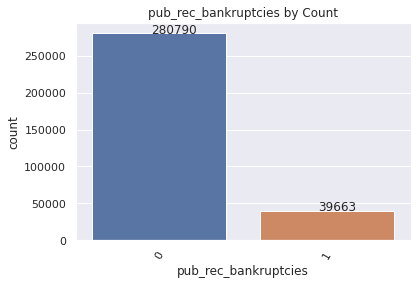

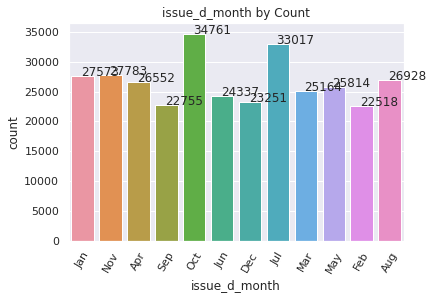

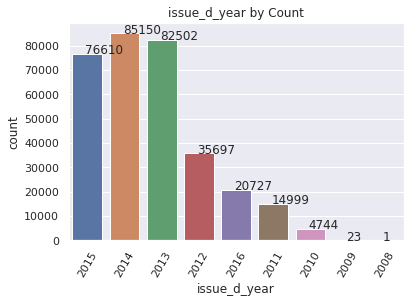

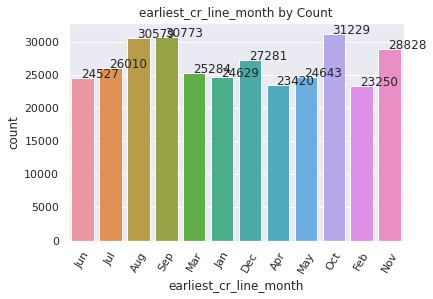

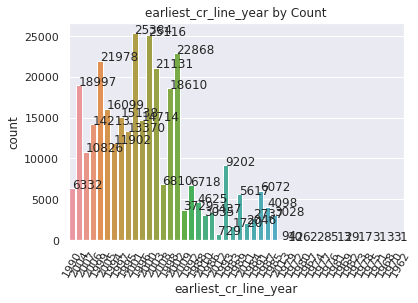

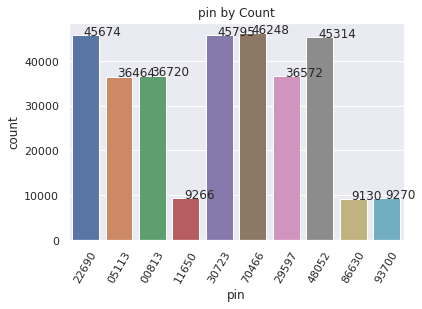

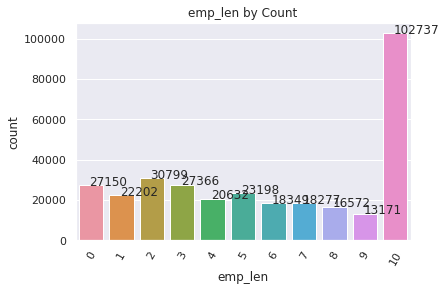

In [70]:
# Count plot of attributes

for col in cat_cols:
  #plt.figure(figsize=(15,5))
  ax = sns.countplot(data=work_df, x=col)
  plt.title(f"{col} by Count")
  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=60)
  plt.show()
  print()


#### **Observation**: 
*   *Age 18 & 19 have more patients and the rest of the ages have equal distribution*
*   *Interestingly Non-Smoker patients count is more than the Smokers count*
*   *Southeast region has more patients and the rest of the regions have equal distribution*
*   *Good to see less number of patients with 'Severity Level' high*

#### **Observation**: *The above charts indicate, we have outliers for 'viral load' and 'hospitalization charges'*

In [72]:
def outlierAnalysis(x):
  Q3, Q1 = np.percentile(work_df[x], [75 ,25])
  IQR = Q3 - Q1
  maxExcludingOutlier = Q3 + 1.5 * IQR
  minExcludingOutlier = Q1 - 1.5 * IQR
  mean = round(work_df[x].mean(),2)
  median = round(work_df[x].median(),2)
  mode = round(work_df[x].mode(), 2)
  print("----------------------------------------------------------")
  print("For the given sample " + x +"Analysis is as Follows: ")
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("Mean: ", round(work_df[x].mean(),2))
  print("Median: ", work_df[x].median())
  print("Mode: " , round(work_df[x].mode(), 2))
  print("IQR: " , IQR)
  print("Maximum " + x +" Excluding Outlier: " , maxExcludingOutlier) 
  print("Minimum " + x + " Purchase Excluding Outlier: " , minExcludingOutlier)

In [73]:
for i in num_features:
  outlierAnalysis(i)

----------------------------------------------------------
For the given sample loan_amntAnalysis is as Follows: 
Q1:  7200.0
Q3:  17500.0
Mean:  12869.53
Median:  11850.0
Mode:  0    10000.0
dtype: float64
IQR:  10300.0
Maximum loan_amnt Excluding Outlier:  32950.0
Minimum loan_amnt Purchase Excluding Outlier:  -8250.0
----------------------------------------------------------
For the given sample termAnalysis is as Follows: 
Q1:  36.0
Q3:  36.0
Mean:  41.66
Median:  36.0
Mode:  0    36
dtype: int64
IQR:  0.0
Maximum term Excluding Outlier:  36.0
Minimum term Purchase Excluding Outlier:  36.0
----------------------------------------------------------
For the given sample int_rateAnalysis is as Follows: 
Q1:  10.65
Q3:  16.55
Mean:  13.72
Median:  13.35
Mode:  0    10.99
dtype: float64
IQR:  5.9
Maximum int_rate Excluding Outlier:  25.400000000000002
Minimum int_rate Purchase Excluding Outlier:  1.799999999999999
----------------------------------------------------------
For the given 

#### Outlier Treatment

In [74]:
work_df[num_features].describe().T

count          mean           std      min       25%  \
loan_amnt             320453.0  12869.531101   7251.814533  1000.00   7200.00   
term                  320453.0     41.658390     10.187458    36.00     36.00   
int_rate              320453.0     13.720224      4.438478     5.32     10.65   
installment           320453.0    392.659107    207.121454    20.22    240.15   
annual_inc            320453.0  63448.644514  26861.837074  4000.00  43000.00   
dti                   320453.0     17.443241      8.034620     0.00     11.45   
open_acc              320453.0     10.844579      4.684013     1.00      7.00   
pub_rec               320453.0      0.155183      0.362080     0.00      0.00   
revol_bal             320453.0  11913.581711   8177.924852     0.00   5628.00   
revol_util            320453.0     53.411927     24.139221     0.00     35.70   
total_acc             320453.0     23.899798     10.470377     2.00     16.00   
mort_acc              320453.0      0.601839      0.489520     0.00      0.00   
pub_rec_bankruptcies  320453.0      0.123772      0.329321     0.00      0.00   
emp_len               320453.0      5.869610      3.628340     0.00      2.00   
tenure                320453.0    107.284067     15.549087    74.00     95.00   
credit_line_Tenure    320453.0    281.409108     70.251067   112.00    232.00   

                           50%       75%        max  
loan_amnt             11850.00  17500.00   38000.00  
term                     36.00     36.00      60.00  
int_rate                 13.35     16.55      30.99  
installment             353.01    514.86    1042.32  
annual_inc            60000.00  80000.00  146885.00  
dti                      17.01     23.04      40.33  
open_acc                 10.00     13.00      45.00  
pub_rec                   0.00      0.00       1.00  
revol_bal             10074.00  16587.00   36686.00  
revol_util               54.20     72.00     892.30  
total_acc                23.00     31.00      54.00  
mort_acc                  1.00      1.00       1.00  
pub_rec_bankruptcies      0.00      0.00       1.00  
emp_len                   6.00     10.00      10.00  
tenure                  106.00    117.00     151.00  
credit_line_Tenure      272.00    324.00     478.00

#### Bivariate Analysis

In [75]:
# Correlation check
plt.figure(figsize=(24,15))
#sns.heatmap(work_df.corr(),annot=True,cmap="YlGnBu")

plt.show()

<Figure size 1728x1080 with 0 Axes>

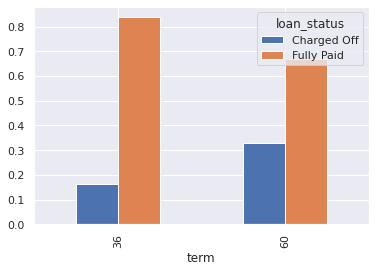

In [77]:
pd.crosstab(columns = work_df["loan_status"],
           index=work_df["term"], 
           normalize="index").plot(kind="bar")

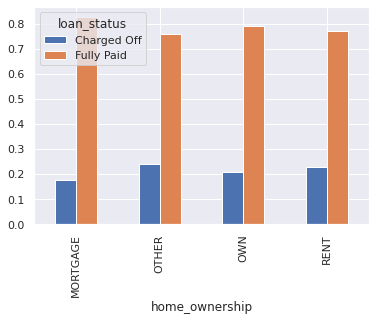

In [78]:
pd.crosstab(columns = work_df["loan_status"],
           index=work_df["home_ownership"], 
           normalize="index").plot(kind="bar")

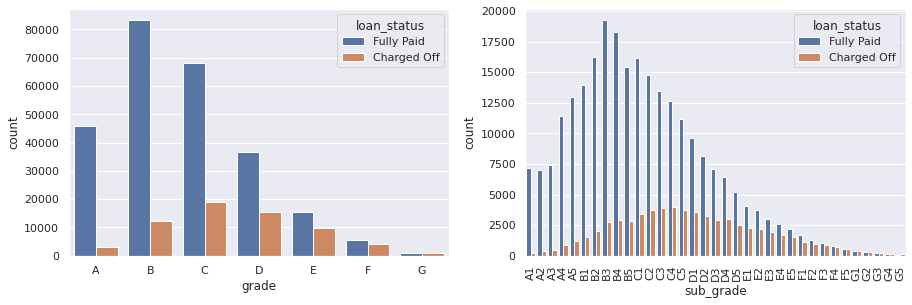

In [79]:

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
grade = sorted(work_df.grade.unique().tolist())
sns.countplot(x='grade', data=work_df, hue='loan_status', order=grade)
plt.subplot(2, 2, 2)
sub_grade = sorted(work_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=work_df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

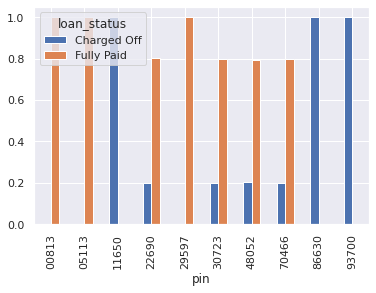

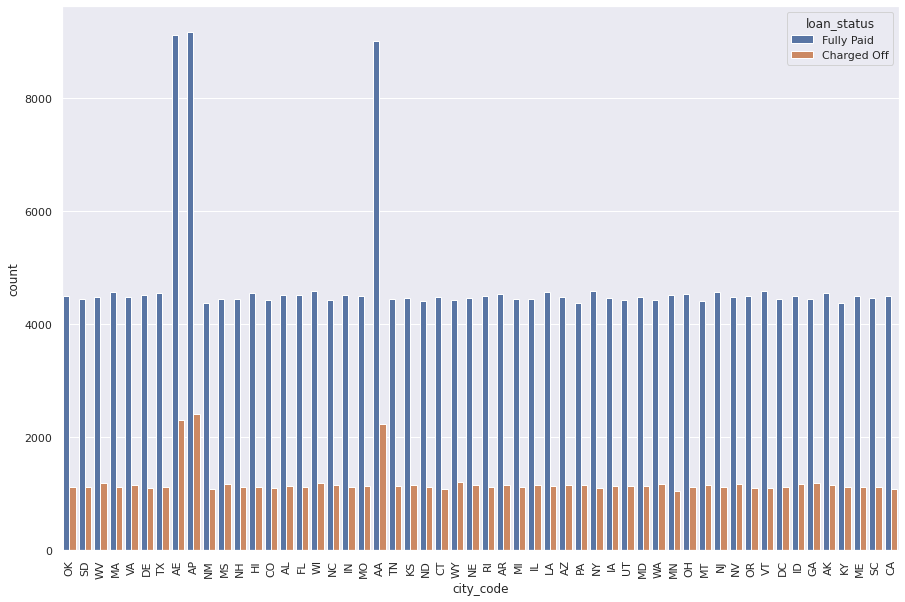

In [76]:
    

pd.crosstab(columns = work_df["loan_status"],
           index=work_df["pin"], 
           normalize="index").plot(kind="bar")
print()
plt.figure(figsize=(15, 10))
g = sns.countplot(x='city_code', data=work_df, hue='loan_status' )
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.show()

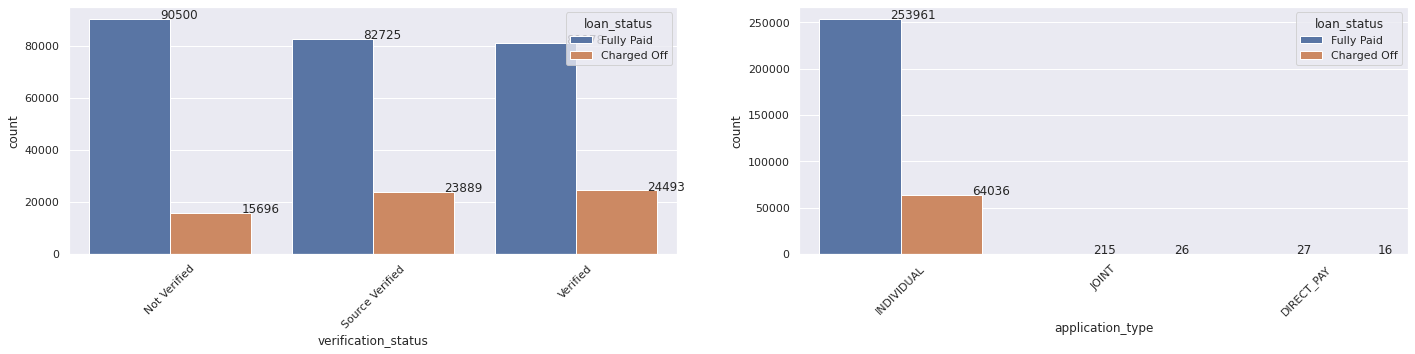

In [ ]:

plt.figure(figsize=(24, 10))
plt.subplot(2, 2, 1)

ax=sns.countplot(x='verification_status', data=work_df, hue='loan_status')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=45)
plt.subplot(2, 2, 2)
ax = sns.countplot(data=work_df, x='application_type',hue='loan_status')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=45)
plt.show()

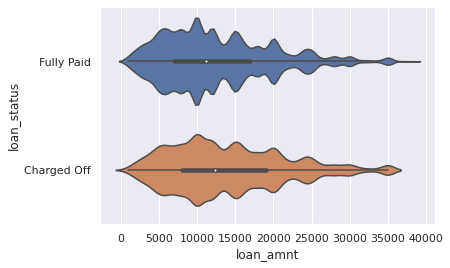

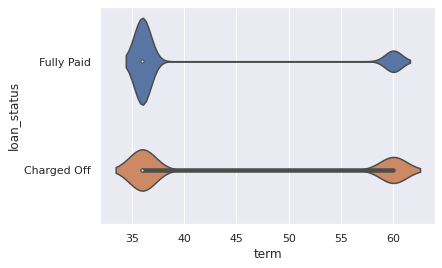

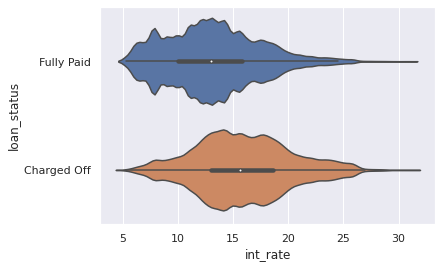

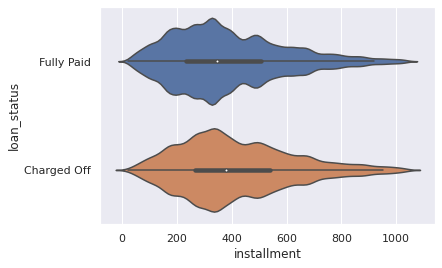

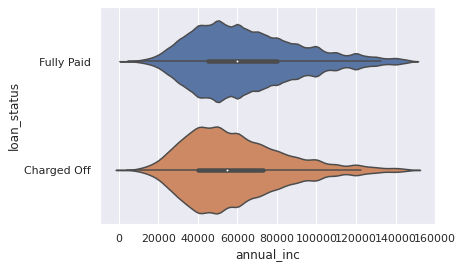

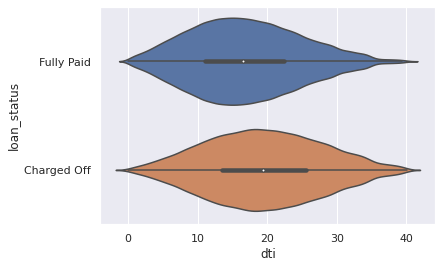

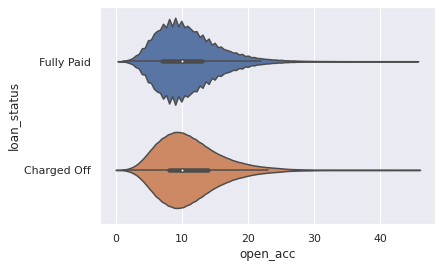

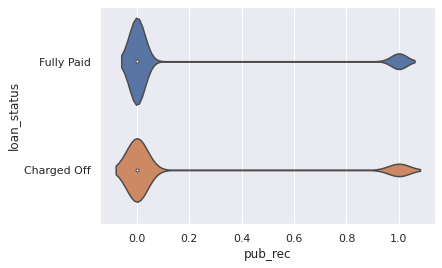

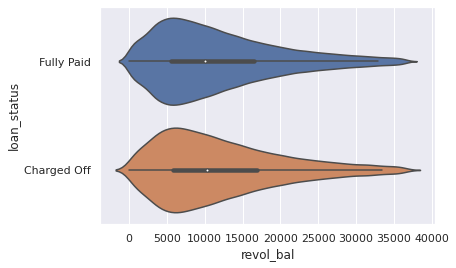

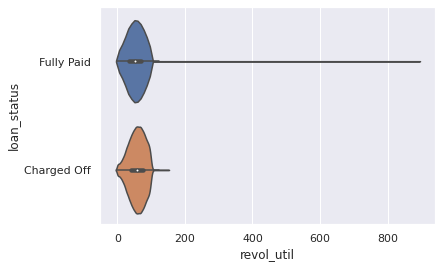

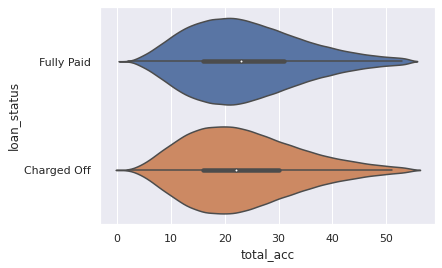

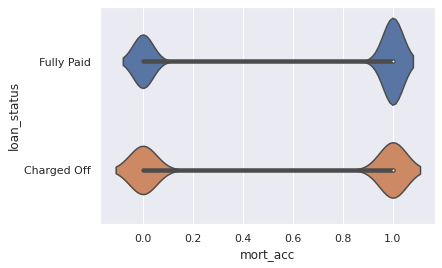

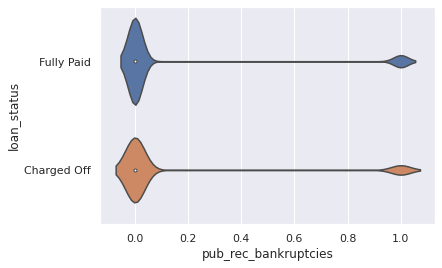

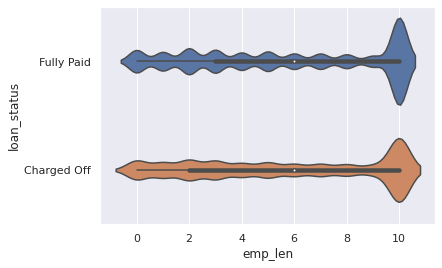

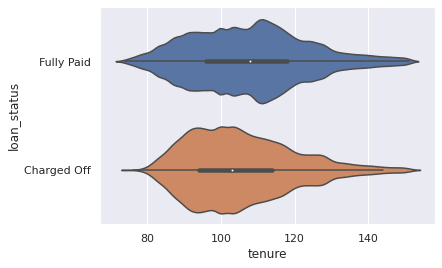

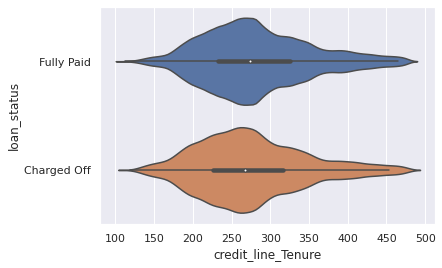

In [87]:
for i in num_features:
  sns.violinplot(data=work_df, x=i,y='loan_status')
  plt.show()
  print()

#### **Observation**: 
*   *Most of the patients are seem to be b/w the ages 28 to 52 and equally distributed b/w both the gender*
*   *Similarly irrespective of smoking habit, the patients seem to be highly distributed b/w 28 and 50 ages*
*   *Similar distribution observed across the regions*



In [ ]:

work_df[cat_cols].head(2)

term grade sub_grade home_ownership verification_status loan_status  \
0    36     B        B4           RENT        Not Verified  Fully Paid   
1    36     B        B5       MORTGAGE        Not Verified  Fully Paid   

              purpose  open_acc  pub_rec initial_list_status application_type  \
0            vacation      16.0        0                   w       INDIVIDUAL   
1  debt_consolidation      17.0        0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies issue_d_month issue_d_year  \
0         0                     0           Jan         2015   
1         1                     0           Jan         2015   

  earliest_cr_line_month earliest_cr_line_year    pin  emp_len  
0                    Jun                  1990  22690       10  
1                    Jul                  2004  05113        4

In [88]:
work_df.nunique()

loan_amnt                   1341
term                           2
int_rate                     424
installment                48821
grade                          7
sub_grade                     35
emp_title                 145399
home_ownership                 4
annual_inc                 22084
verification_status            3
loan_status                    2
purpose                       14
title                      38157
dti                         4007
open_acc                      45
pub_rec                        2
revol_bal                  35343
revol_util                  1184
total_acc                     53
initial_list_status            2
application_type               3
mort_acc                       2
pub_rec_bankruptcies           2
issue_d_month                 12
issue_d_year                   9
earliest_cr_line_month        12
earliest_cr_line_year         48
pin                           10
city_code                     54
emp_len                       11
tenure    

In [ ]:
work_df[cat_features].head(2)

grade sub_grade        emp_title home_ownership verification_status  \
0     B        B4        Marketing           RENT        Not Verified   
1     B        B5  Credit analyst        MORTGAGE        Not Verified   

  loan_status             purpose               title initial_list_status  \
0  Fully Paid            vacation            Vacation                   w   
1  Fully Paid  debt_consolidation  Debt consolidation                   f   

  application_type issue_d_month issue_d_year earliest_cr_line_month  \
0       INDIVIDUAL           Jan         2015                    Jun   
1       INDIVIDUAL           Jan         2015                    Jul   

  earliest_cr_line_year                                   street    pin  
0                  1990     0174 Michelle Gateway\r\nMendozaberg  22690  
1                  2004  1076 Carney Fort Apt. 347\r\nLoganmouth  05113

In [89]:
label_encoder = LabelEncoder()
# Encode labels in column 'Country'.
work_df['grade']= label_encoder.fit_transform(work_df['grade'])
work_df['sub_grade']= label_encoder.fit_transform(work_df['sub_grade'])
work_df['home_ownership']= label_encoder.fit_transform(work_df['home_ownership'])

work_df['verification_status']= label_encoder.fit_transform(work_df['verification_status'])
work_df['purpose']= label_encoder.fit_transform(work_df['purpose'])
work_df['initial_list_status']= label_encoder.fit_transform(work_df['initial_list_status'])

work_df['application_type']= label_encoder.fit_transform(work_df['application_type'])
work_df['issue_d_month']= label_encoder.fit_transform(work_df['issue_d_month'])
work_df['earliest_cr_line_month']= label_encoder.fit_transform(work_df['earliest_cr_line_month'])

work_df['city_code']= label_encoder.fit_transform(work_df['city_code'])

In [90]:

work_df['emp_title']= label_encoder.fit_transform(work_df['emp_title'])

work_df['loan_status']= label_encoder.fit_transform(work_df['loan_status'])

In [91]:
work_df[cat_features].head(2)

grade  sub_grade  emp_title  home_ownership  verification_status  \
0      1          8      67757               3                    0   
1      1          9      28049               0                    0   

   loan_status  purpose               title  initial_list_status  \
0            1       12            Vacation                    1   
1            1        2  Debt consolidation                    0   

   application_type  issue_d_month issue_d_year  earliest_cr_line_month  \
0                 1              4         2015                       6   
1                 1              4         2015                       5   

  earliest_cr_line_year    pin  city_code  
0                  1990  22690         39  
1                  2004  05113         44

In [92]:
ob_to_Int=['term','mort_acc','pub_rec_bankruptcies','issue_d_year','earliest_cr_line_year','pin','emp_len']
work_df['term'].astype(int)

work_df['mort_acc'].astype(int)
work_df['pub_rec_bankruptcies'].astype(int)
work_df['issue_d_year'].astype(int)
work_df['earliest_cr_line_year'].astype(int)
work_df['pin'].astype(int)

work_df['emp_len'].astype(int)

0         10
1          4
2          0
3          6
4          9
          ..
396024     5
396025     2
396027    10
396028    10
396029    10
Name: emp_len, Length: 320453, dtype: int64

In [93]:
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['title', 'issue_d_year', 'earliest_cr_line_year', 'pin']

In [97]:
work_df[['pin','issue_d_year']].value_counts()

pin    issue_d_year
30723  2014            12445
48052  2014            12111
70466  2014            12021
22690  2014            11960
70466  2013            11931
                       ...  
48052  2009                3
22690  2009                3
05113  2009                3
30723  2009                1
00813  2008                1
Length: 78, dtype: int64

In [98]:
work_df=work_df.drop(['title','emp_title'], axis=1)

In [99]:
# Independnet features
X = work_df.drop(['loan_status'], axis=1)
# Dependent feature
Target = work_df['loan_status']
X.tail()

loan_amnt  term  int_rate  installment  grade  sub_grade  \
396024     6000.0    36     13.11       202.49      1          8   
396025    10000.0    60     10.99       217.38      1          8   
396027     5000.0    36      9.99       161.32      1          5   
396028    21000.0    60     15.31       503.02      2         11   
396029     2000.0    36     13.61        67.98      2         11   

        home_ownership  annual_inc  verification_status  purpose    dti  \
396024               3     64000.0                    0        2  10.81   
396025               3     40000.0                    1        2  15.63   
396027               3     56500.0                    2        2  17.56   
396028               0     64000.0                    2        2  15.88   
396029               3     42996.0                    2        2   8.32   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
396024       7.0        0    11456.0        97.1        9.0   
396025       6.0        0     1990.0        34.3       23.0   
396027      15.0        0    32704.0        66.9       23.0   
396028       9.0        0    15704.0        53.8       20.0   
396029       3.0        0     4292.0        91.3       19.0   

        initial_list_status  application_type  mort_acc  pub_rec_bankruptcies  \
396024                    1                 1         0                     0   
396025                    1                 1         0                     0   
396027                    0                 1         0                     0   
396028                    0                 1         1                     0   
396029                    0                 1         1                     0   

        issue_d_month issue_d_year  earliest_cr_line_month  \
396024              7         2013                       9   
396025             10         2015                       9   
396027             10         2013                       7   
396028              1         2012                       9   
396029              6         2010                      11   

       earliest_cr_line_year    pin  city_code  emp_len  tenure  \
396024                  1991  05113         43        5   128.0   
396025                  2004  30723         10        2   128.0   
396027                  1997  70466         37       10   128.0   
396028                  1990  29597         12       10   128.0   
396029                  1998  48052          5       10   128.0   

        credit_line_Tenure  
396024               281.0  
396025               281.0  
396027               281.0  
396028               281.0  
396029               281.0

In [102]:
scaler = StandardScaler()
std_data = scaler.fit_transform(X)
print(std_data)

[[-0.39569898 -0.55542792 -0.51374079 ...  1.1383711  -0.66139463
   1.57422612]
 [-0.67149245 -0.55542792 -0.38982425 ... -0.51528047 -0.66139463
  -0.83143505]
 [ 0.37652275 -0.55542792 -0.72777844 ... -1.61771486 -0.66139463
  -1.35811827]
 ...
 [-1.08518266 -0.55542792 -0.84042984 ...  1.1383711   1.33229467
  -0.00582353]
 [ 1.12116513  1.80041365  0.35818104 ...  1.1383711   1.33229467
  -0.00582353]
 [-1.49887287 -0.55542792 -0.02483372 ...  1.1383711   1.33229467
  -0.00582353]]


In [103]:
std_df = pd.DataFrame(std_data, columns=X.columns)
std_df.head()

loan_amnt      term  int_rate  installment     grade  sub_grade  \
0  -0.395699 -0.555428 -0.513741    -0.305035 -0.631650  -0.480834   
1  -0.671492 -0.555428 -0.389824    -0.613067 -0.631650  -0.327738   
2   0.376523 -0.555428 -0.727778     0.551904 -0.631650  -0.633929   
3  -0.781810 -0.555428 -1.628990    -0.830476 -1.389000  -1.552500   
4   1.586567  1.800414  0.799775     1.046107  0.125701   0.437738   

   home_ownership  annual_inc  verification_status   purpose       dti  \
0        1.049941    1.993588            -1.223591  3.862864  1.094859   
1       -1.039169    0.057753            -1.223591 -0.285682  0.573365   
2        1.049941   -0.759132             0.002702 -0.700537 -0.579150   
3        1.049941   -0.351750            -1.223591 -0.700537 -1.847413   
4       -1.039169   -0.314523             1.228994 -0.700537  2.054457   

   open_acc   pub_rec  revol_bal  revol_util  total_acc  initial_list_status  \
0  1.100644 -0.428589   2.990423   -0.481041   0.105078             1.225408   
1  1.314136 -0.428589   1.004831   -0.004637   0.296093            -0.816055   
2  0.460166 -0.428589   0.008978    1.606851   0.200585            -0.816055   
3 -1.034281 -0.428589  -0.787680   -1.321997  -1.041015            -0.816055   
4  0.460166 -0.428589   1.549346    0.678899   1.824216            -0.816055   

   application_type  mort_acc  pub_rec_bankruptcies  issue_d_month  \
0         -0.020687 -1.229449             -0.375839      -0.463363   
1         -0.020687  0.813373             -0.375839      -0.463363   
2         -0.020687 -1.229449             -0.375839      -0.463363   
3         -0.020687 -1.229449             -0.375839       0.988985   
4         -0.020687  0.813373             -0.375839      -1.625241   

   issue_d_year  earliest_cr_line_month  earliest_cr_line_year       pin  \
0      0.987814                0.095218              -1.553793 -0.446568   
1      0.987814               -0.188039               0.824785 -1.131058   
2      0.987814               -1.321067               1.334480 -1.131058   
3      0.234808                1.511504               1.164582 -1.298511   
4     -0.518198                0.378475              -0.024707 -0.876492   

   city_code   emp_len    tenure  credit_line_Tenure  
0   0.855156  1.138371 -0.661395            1.574226  
1   1.164012 -0.515280 -0.661395           -0.831435  
2   1.658182 -1.617715 -0.661395           -1.358118  
3  -0.194955  0.035937 -0.532770           -1.201537  
4   1.411097  0.862763  0.689169            0.079585

In [104]:
import statsmodels.api as sm
xt = sm.add_constant(X)
#model = sm.OLS(Target, xt).fit()
#fit regression model
model = sm.OLS(Target, xt.astype(float)).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     2661.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:06:48   Log-Likelihood:            -1.2728e+05
No. Observations:              320453   AIC:                         2.546e+05
Df Residuals:                  320423   BIC:                         2.549e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     34

In [127]:
new_X = X.drop(['city_code', 'emp_len','earliest_cr_line_month','earliest_cr_line_year'], axis=1)
new_X.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  home_ownership  \
0    10000.0    36     11.44       329.48      1          8               3   
1     8000.0    36     11.99       265.68      1          9               0   
2    15600.0    36     10.49       506.97      1          7               3   
3     7200.0    36      6.49       220.65      0          1               3   
4    24375.0    60     17.27       609.33      2         14               0   

   annual_inc  verification_status  purpose    dti  open_acc  pub_rec  \
0    117000.0                    0       12  26.24      16.0        0   
1     65000.0                    0        2  22.05      17.0        0   
2     43057.0                    1        1  12.79      13.0        0   
3     54000.0                    0        1   2.60       6.0        0   
4     55000.0                    2        1  33.95      13.0        0   

   revol_bal  revol_util  total_acc  initial_list_status  application_type  \
0    36369.0        41.8       25.0                    1                 1   
1    20131.0        53.3       27.0                    0                 1   
2    11987.0        92.2       26.0                    0                 1   
3     5472.0        21.5       13.0                    0                 1   
4    24584.0        69.8       43.0                    0                 1   

   mort_acc  pub_rec_bankruptcies  issue_d_month issue_d_year    pin  tenure  \
0         0                     0              4         2015  22690    97.0   
1         1                     0              4         2015  05113    97.0   
2         0                     0              4         2015  05113    97.0   
3         0                     0              9         2014  00813    99.0   
4         1                     0              0         2013  11650   118.0   

   credit_line_Tenure  
0               392.0  
1               223.0  
2               186.0  
3               197.0  
4               287.0

In [128]:
xt = sm.add_constant(new_X)
#model = sm.OLS(Target, xt).fit()
#fit regression model
model = sm.OLS(Target, xt.astype(float)).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3086.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:29:09   Log-Likelihood:            -1.2728e+05
No. Observations:              320453   AIC:                         2.546e+05
Df Residuals:                  320427   BIC:                         2.549e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   31.0461 

In [129]:
# Get the Train-Test split
from sklearn.model_selection import train_test_split
     
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(new_X, Target, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(192271, 25)

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [161]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [162]:
model.coef_

array([[-0.04292554, -0.19477044,  0.31356964, -0.07333226, -0.03164854,
        -0.70570437, -0.09708401,  0.21304091, -0.04364549, -0.03341828,
        -0.16738041, -0.14729737, -0.06538851,  0.0825426 , -0.14124687,
         0.10781458,  0.01794547,  0.02994216,  0.05313496,  0.05218408,
        -0.01407715, -0.17879809, -0.86517793, -0.11614559, -0.02690741]])

In [163]:
model.intercept_

array([1.74116642])

In [164]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.8344524135204997, Val Accuracy:0.8347661918210045


In [165]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

In [166]:
len(val_scores)

120

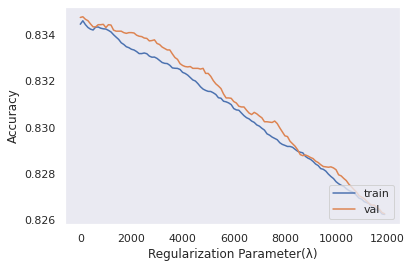

In [167]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [168]:
np.argmax(val_scores)

1

In [169]:
val_scores[23]

0.8339392426393721

In [170]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.8283222293301712


In [171]:
pred_Y= model.predict(X_test)
print(pred_Y )

[1 1 1 ... 1 1 1]


In [172]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': pred_Y})
df_results.head()

Actual  Predicted
118095       1          1
379466       1          1
243734       1          1
3429         1          1
270197       1          1

In [173]:
errors=df_results['Predicted']-df_results['Actual']
errors

118095    0
379466    0
243734    0
3429      0
270197    0
         ..
59359     0
25570     0
19683     0
286887    0
24473     0
Length: 64091, dtype: int64

Text(0.5, 1.0, 'Train Data Distribution')

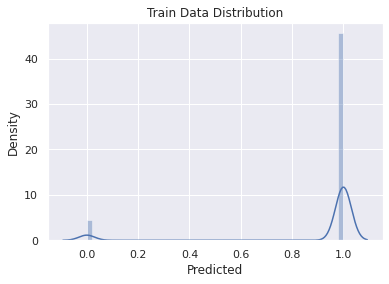

In [174]:
sns.distplot(df_results['Predicted'])
plt.title("Train Data Distribution")

Text(0.5, 0, 'Prediction Level')

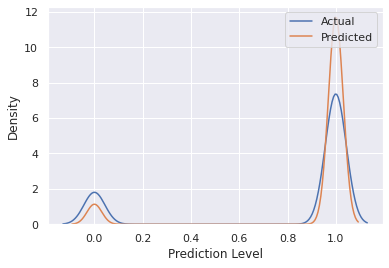

In [175]:
sns.distplot(df_results['Actual'], hist=False, label='Actual')
sns.distplot(df_results['Predicted'], hist=False, label='Predicted')
plt.legend(loc='upper right')
plt.xlabel('Prediction Level')

Text(0.5, 1.0, 'Histogram of residuals')

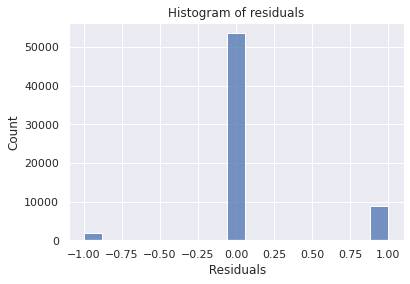

In [176]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

Text(0.5, 1.0, 'Predicted values vs Residuals')

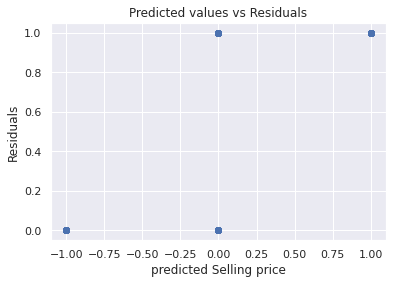

In [177]:
plt.scatter(errors,df_results['Predicted'])
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

In [178]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
  explained_variance=metrics.explained_variance_score(y_true, y_pred)
  mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
  mse=metrics.mean_squared_error(y_true, y_pred)
  mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
  median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
  r2=metrics.r2_score(y_true, y_pred)
  print('explained_variance: ', round(explained_variance,4))
  print('mean_squared_log_error: ', round(mean_squared_log_error,4))
  print('r2: ', round(r2,4))
  print('MAE: ', round(mean_absolute_error,4))

In [179]:
regression_results(y_test, pred_Y)

explained_variance:  0.0349
mean_squared_log_error:  0.0791
r2:  -0.04
MAE:  0.1646


In [180]:
y_pred = scaled_lr.predict(X_test)

In [181]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
cm  

array([[ 2542, 10089],
       [  914, 50546]])

In [182]:
precision_score(y_test, y_pred)

0.8336109507710069

In [183]:

recall_score(y_test, y_pred)

0.9822386319471434

In [184]:
f1_score(y_test, y_pred)

0.9018421874303048

In [185]:

# Estimate the probability of belonging to Class 1
probs = model.predict_proba(X_test)[:, 1]

0.7851743544982436

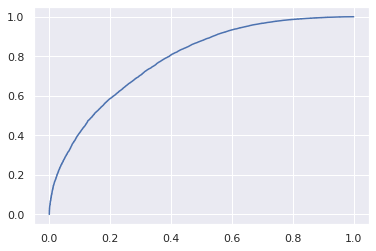

In [186]:

from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thres = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
roc_auc_score(y_test, probs)

# Observations & Insights



*   There is no missing or duplicate value in the given dataset
*   Age 18 & 19 have more patients and the rest of the ages have equal distribution
*   Interestingly Non-Smoker patients count is more than the Smokers count
*   Southeast region has more patients and the rest of the regions have equal distribution
*   Good to see less number of patients with 'Severity Level' high
*   There are outliers in 'viral load' and 'hospitalization charges' columns
*   There is a high correlatioin b/w Age & Hospitalization Charges. As the age increases, hospitalization charges also increases
*   Also, hospitalization seem to increase with the age, and more specifically for women   
*   Female patients seems to be little more vulnerable to viral load than Male patients
*   Incidently non-smokers tend to have high viral load than smokers
*   Amongst regions, Southeast is impacted high viral load than other regions
*   Male patients tend to incur high charges
*   Evidently Smokers are paying more than the non-smokers
*   Southeast region has higher hospitalization charges amongst regions
*   Hospitalization charges increase with age and that too in women segment

**Observations from Hypothesis Testing:**

*   Hospitalization Charges for smokers is higher than for non-smokers
*   Viral Load in Females is more compared to Males
*   Proportion of smoking is almost similar across the regions
*   Viral Load of women with Severity levels - 0,1,2 are more or less same




# Recommendations

Based on the above observations and insights, some of the recommendations to consider are: 
*   It is alarming to see high number of patients at lower age group 18-20. It's high time to role out stable nutrition programs for children & teens.
*   Notably Southeast region is impacted with high viral load and increased hospitalization charges. Special attention needs to be given in this region
*   As age has direct proportion to the increased hospitalization charges, Apollo can come up with targeted healthcare policy & programs for higher age groups
*   Female gender group requires specific, focused attention 
*   Special medi-claim policy can be launced for Smokers 